In [1]:
from PIL import Image
import urllib.request
import requests
import pickle
from termcolor import colored
from matplotlib import gridspec
from plotly.subplots import make_subplots
from collections import Counter
import io
import base64
from datetime import datetime
import missingno as msno
import datetime as dt
import os
import plotly as py
import dash
from dash import dcc, html
from dash.dependencies import Output, Input
import plotly.express as px
import dash_bootstrap_components as dbc
import pandas as pd
import pandas_datareader.data as web
import datetime
import plotly.graph_objs as go
import pandas_datareader.data as web
import datetime
import plotly.graph_objs as go
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.colors
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)
plt.rcParams['figure.dpi'] = 140


In [2]:
# Load the Netflix movies and TV shows dataset
dff = pd.read_csv("D:\\Courses_Sem2\\Big_Data\\Divyesh_Netflix\\CS661_Big_Data-master\\CS661_Big_Data-master\\movies_and_tv_shows\\netflix_titles.csv")
# Clean the data


for i in dff.columns:
    null_rate = dff[i].isna().sum() / len(dff) * 100

dff['country'] = dff['country'].fillna(dff['country'].mode()[0])


dff['cast'].replace(np.nan, 'No Data', inplace=True)
dff['director'].replace(np.nan, 'No Data', inplace=True)

dff.drop_duplicates(inplace=True)
dff.dropna(inplace=True)

# print(type(dff['date_added']))
dff['date_added'] = dff['date_added'].str.strip()
# print(type(dff['date_added']))
dff["date_added"] = pd.to_datetime(dff['date_added'])

dff['month_added'] = dff['date_added'].dt.month
dff['month_name_added'] = dff['date_added'].dt.month_name()
dff['year_added'] = dff['date_added'].dt.year


dff1 = pd.read_csv(
    "D:\\Courses_Sem2\\Big_Data\\Divyesh_Netflix\\CS661_Big_Data-master\\CS661_Big_Data-master\\movies_and_tv_shows\\netflix_titles.csv")

dff2 = pd.read_csv(
    "D:\\Courses_Sem2\\Big_Data\\Divyesh_Netflix\\CS661_Big_Data-master\\CS661_Big_Data-master\\movies_and_tv_shows\\netflix_titles.csv")
dff2['country'].fillna('Missing', inplace=True)
dff2['date_added'].fillna('Missing', inplace=True)
dff2['rating'].fillna('Missing', inplace=True)

# Converting into a proper date-time format and adding two more features year and month.
dff2["date_added"] = pd.to_datetime(
    dff2['date_added'], format='%B %d, %Y', errors='coerce')
dff2['year_added'] = dff2['date_added'].dt.year
dff2['month_added'] = dff2['date_added'].dt.month

# Finding seasons from durations
dff2['season_count'] = dff2.apply(lambda x: x['duration'].split(" ")[0] if isinstance(
    x['duration'], str) and "Season" in x['duration'] else "", axis=1)
dff2['duration'] = dff2.apply(lambda x: x['duration'].split(" ")[0] if isinstance(
    x['duration'], str) and "Season" not in x['duration'] else "", axis=1)
dff2 = dff2.rename(columns={"listed_in": "genre"})
dff2['genre'] = dff2['genre'].apply(lambda x: x.split(",")[0])

dff3 = pd.read_csv("D:\\Courses_Sem2\\Big_Data\\Divyesh_Netflix\\CS661_Big_Data-master\\CS661_Big_Data-master\\movies_and_tv_shows\\netflix_titles.csv")
dff3.drop(['director'], axis=1, inplace=True)
dff3['country'].replace(np.nan, 'United States', inplace=True)

dff3['cast'].replace(np.nan, 'No Data', inplace=True)
dff3.dropna(inplace=True)
dff3['date_added'] = dff3['date_added'].str.strip()
dff3["date_added"] = pd.to_datetime(dff3['date_added'])

dff3['month_added'] = dff3['date_added'].dt.month
dff3['month_name_added'] = dff3['date_added'].dt.month_name()
dff3['year_added'] = dff3['date_added'].dt.year

# Droping the column 'date_added' as it we have seperate columns for 'year_added' and 'month_added'

dff3.drop('date_added', axis=1, inplace=True)

In [3]:
# Read the CSV file
# df = pd.read_csv("revenue.csv")
r_df1 = pd.read_csv(
    "D:\\Courses_Sem2\\Big_Data\\Divyesh_Netflix\\CS661_Big_Data-master\\CS661_Big_Data-master\\Netflix_subscribers_and_revenue_by_country\\DataNetflixRevenue2020_V2.csv")
r_df2 = pd.read_csv(
    "D:\\Courses_Sem2\\Big_Data\\Divyesh_Netflix\\CS661_Big_Data-master\\CS661_Big_Data-master\\Netflix_subscribers_and_revenue_by_country\\DataNetflixSubscriber2020_V2.csv")
# Merge the two datasets based on "Area" and "Years"
r_df = pd.merge(r_df1, r_df2, on=["Area", "Years"])

# Calculate the revenue generated by subscription
r_df["Revenue generated by subscription"] = r_df["Revenue"] / r_df["Subscribers"]

# Load the CSV file into a Pandas DataFrame
o_df = pd.read_csv(
    'D:\\Courses_Sem2\\Big_Data\\Divyesh_Netflix\\CS661_Big_Data-master\\CS661_Big_Data-master\\Netflix_Original_Films _IMDB_Scores\\NetflixOriginals.csv', encoding='ISO-8859-1')

In [4]:
# Read the CSV files
movies_csv_path = os.path.expanduser(
    "D:\\Courses_Sem2\\Big_Data\\Divyesh_Netflix\\CS661_Big_Data-master\\CS661_Big_Data-master\\Best Movies Netflix.csv")
shows_csv_path = os.path.expanduser(
    "D:\\Courses_Sem2\\Big_Data\\Divyesh_Netflix\\CS661_Big_Data-master\\CS661_Big_Data-master\\Best Shows Netflix.csv")
df_movies = pd.read_csv(movies_csv_path)
df_shows = pd.read_csv(shows_csv_path)

# Define function to get most popular movie or show


def get_most_popular_item(x):
    try:
        most_popular_idx = x['NUMBER_OF_VOTES'].idxmax()
        most_popular_title = x.loc[most_popular_idx, 'TITLE']
        most_popular_votes = x.loc[most_popular_idx, 'NUMBER_OF_VOTES']
        return pd.Series({'TITLE': most_popular_title, 'NUMBER_OF_VOTES': most_popular_votes})
    except:
        return pd.Series({'TITLE': '', 'NUMBER_OF_VOTES': 0})


# Group by release year and get the most popular movie or show
df_movies_grouped = df_movies[['RELEASE_YEAR', 'NUMBER_OF_VOTES', 'TITLE']].groupby(
    'RELEASE_YEAR').apply(get_most_popular_item).reset_index()
df_shows_grouped = df_shows[['RELEASE_YEAR', 'NUMBER_OF_VOTES', 'TITLE']].groupby(
    'RELEASE_YEAR').apply(get_most_popular_item).reset_index()

# Convert 'RELEASE_YEAR' to integer
df_movies_grouped['RELEASE_YEAR'] = df_movies_grouped['RELEASE_YEAR'].astype(
    int)
df_shows_grouped['RELEASE_YEAR'] = df_shows_grouped['RELEASE_YEAR'].astype(int)

# Sort the data by 'RELEASE_YEAR'
df_movies_grouped = df_movies_grouped.sort_values('RELEASE_YEAR')
df_shows_grouped = df_shows_grouped.sort_values('RELEASE_YEAR')


findfont: Font family 'Muli, sans-serif' not found.
findfont: Font family 'Muli, sans-serif' not found.
findfont: Font family 'Muli, sans-serif' not found.
findfont: Font family 'Muli, sans-serif' not found.
findfont: Font family 'Muli, sans-serif' not found.
findfont: Font family 'Muli, sans-serif' not found.
findfont: Font family 'Muli, sans-serif' not found.


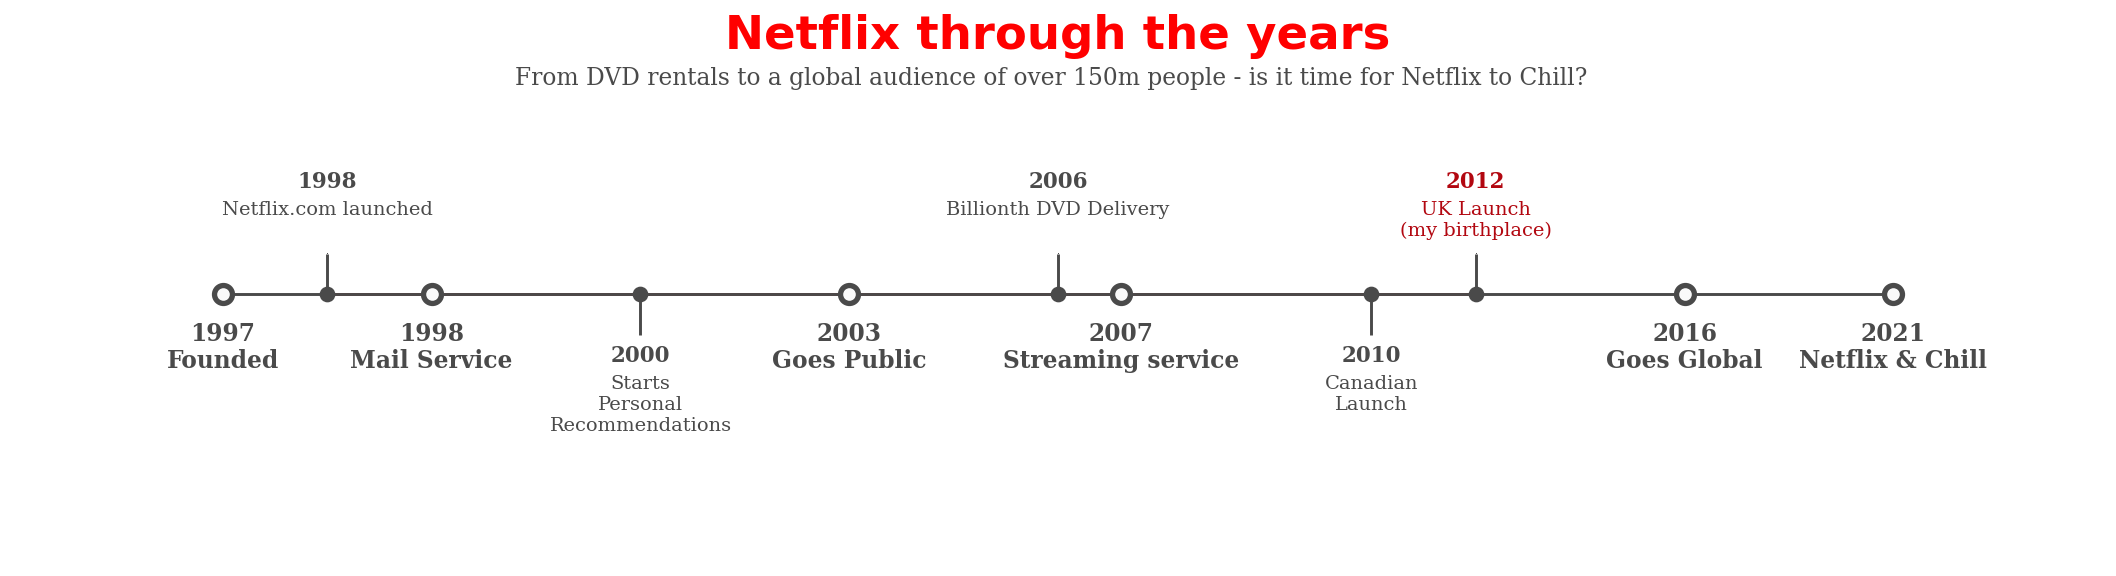

In [5]:
# Figure

# these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8, 9]

# these go on the numbers
tl_sub_x = [1.5, 3, 5, 6.5, 7]


tl_sub_times = [
    "1998", "2000", "2006", "2010", "2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations", "Billionth DVD Delivery", "Canadian\nLaunch", "UK Launch\n(my birthplace)"]


# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a', zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a', fontsize=12)


# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(
    tl_sub_x, levels, use_line_collection=True)
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx % 2)-0.5, time, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx != len(tl_sub_x) else '#b20710', fontsize=11)

    ax.text(x, 1.3*(idx % 2)-0.6, txt, va='top', ha='center',
            fontfamily='serif', color='#4a4a4a' if idx != len(tl_sub_x) else '#b20710')


# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks
ax.set_xticks([])
ax.set_yticks([])

# Title
ax.set_title("Netflix through the years", fontweight="bold",
             fontfamily='Muli, sans-serif', fontsize=24, color='red')
ax.text(2.4, 1.57, "From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?",
        fontfamily='serif', fontsize=12, color='#4a4a4a')
buf = io.BytesIO()
ax.get_figure().savefig(buf, format='png')
buf.seek(0)
plot_data = base64.b64encode(buf.read()).decode('utf-8')


In [6]:
# figure 1

df1 = dff[['type', 'release_year']]
df1 = df1.rename(columns={"release_year": "Release Year"})
df2 = df1.groupby(['Release Year', 'type']).size(
).reset_index(name='Total Content')
df2 = df2[df2['Release Year'] >= 2010]
fig1 = px.line(df2, x="Release Year", y="Total Content", color='type',
               title='Trend of content produced over the years on Netflix')
fig1.update_xaxes(showgrid=False)
fig1.update_yaxes(showgrid=False)
fig1.update_layout(title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
                   font=dict(color='#fff'),
                   plot_bgcolor='#333', paper_bgcolor='#333',
                   xaxis_title='Release Year', yaxis_title='Total Content',
                   legend=dict(orientation="h", yanchor="bottom",
                               y=1, xanchor="center", x=0.5),
                   hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))
fig1.show()


In [7]:
# figure 2

fig_donut = px.pie(dff2, names='type', hole=0.7,

                   title='Movies and TV show  Distribution',

                   color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

                        textinfo='percent+label', rotation=90)

fig_donut.update_layout( showlegend=False,

                        plot_bgcolor='#333', paper_bgcolor='#333',

                        title_font=dict(size=25, color='#fff',
                                        family="Lato, sans-serif"),

                        font=dict(size=17, color='#fff'),

                        hoverlabel=dict(bgcolor="#444", font_size=13,

                                        font_family="Lato, sans-serif"))

# Define the options for the country dropdown
country_options = [{'label': country, 'value': country}
                   for country in dff2['country'].unique()]
fig_donut.show()


In [8]:
netflix_data = pd.read_csv(
    "D:\\Courses_Sem2\\Big_Data\\Divyesh_Netflix\\CS661_Big_Data-master\\CS661_Big_Data-master\\movies_and_tv_shows\\netflix_titles.csv")

# Group the data by country and show type to get the count of movies and TV shows by country
country_data = netflix_data.groupby(
    ["country", "type"]).size().reset_index(name="count")

# Create the world map plot using Plotly
fig3 = px.choropleth(country_data, locations="country", locationmode="country names",
                     color="type", hover_name="country",
                     title="Worldwide Distribution of Netflix Movies and TV Shows",
                     color_discrete_sequence=['red', 'black'])
fig3.update_layout(
    # height=400,
    # width=600,
    plot_bgcolor='#333', paper_bgcolor='#333',
    title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
    font=dict(color='#8a8d93'),
    height=600,
    
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)

fig3.show()


In [9]:
netflix_data.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Create the world map plot using Plotly
movie_data = netflix_data[netflix_data["type"] == "Movie"]
country_counts = movie_data.groupby("country").size().reset_index(name="count")

fig4 = px.choropleth(country_counts, locations="country", locationmode="country names",
                     color="count", hover_name="country",
                     title="Worldwide Distribution of Netflix Movies",
                     color_continuous_scale=["red", "black"])
fig4.update_layout(
    plot_bgcolor='#333', paper_bgcolor='#333',
    title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
    font=dict(color='#fff'),
    height=600,
    
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)


In [11]:
# figure 5
show_data = netflix_data[netflix_data["type"] == "TV Show"]

# Group the data by country to get the count of movies by country
country_counts = show_data.groupby("country").size().reset_index(name="count")

# Create the world map plot using Plotly
fig5 = px.choropleth(country_counts, locations="country", locationmode="country names",
                     color="count", hover_name="country",
                     title="Worldwide Distribution of Netflix TV Shows",
                     color_continuous_scale=["red", "black"])
fig5.update_layout(
    plot_bgcolor='#333', paper_bgcolor='#333',
    title_font=dict(size=25, color='#fff',
                    family="Lato, sans-serif"),
    font=dict(color='#fff'),
    height=600,
    margin=dict(l=15, r=15, t=50, b=10, pad=0)
)
fig5.show()


In [12]:
# Figure 6

# Group the data by country and show type to get the count of movies and TV shows by country
country_data = netflix_data.groupby(
    ["country", "type"]).size().reset_index(name="count")

# Sort the data by count in descending order and get the top 20 countries
top_countries = country_data.sort_values(by="count", ascending=False).head(25)

# Create separate dataframes for movies and TV shows in top 20 countries
movies_data = top_countries[top_countries["type"] == "Movie"]
tv_shows_data = top_countries[top_countries["type"] == "TV Show"]

# Create the joint-bar graph using Plotly
fig6 = go.Figure()

fig6.add_trace(
    go.Bar(
        x=movies_data["country"],
        y=movies_data["count"],
        name="Movies",
        marker=dict(color="red"),
        text=movies_data["count"],
        textposition="auto"
    )
)

fig6.add_trace(
    go.Bar(
        x=tv_shows_data["country"],
        y=tv_shows_data["count"],
        name="TV Shows",
        marker=dict(color="darkred"),
        text=tv_shows_data["count"],
        textposition="auto"
    )
)

fig6.update_layout(
    title="Number of Movies and TV Shows Available in Top 25 Countries",
    xaxis=dict(title="Country"),
    yaxis=dict(title="Count"),
    barmode="group",
    bargap=0.1,
    bargroupgap=0.2,
    plot_bgcolor="#333",
    paper_bgcolor="#333",
    font=dict(color="white"),
    height=500
)

fig6.show()


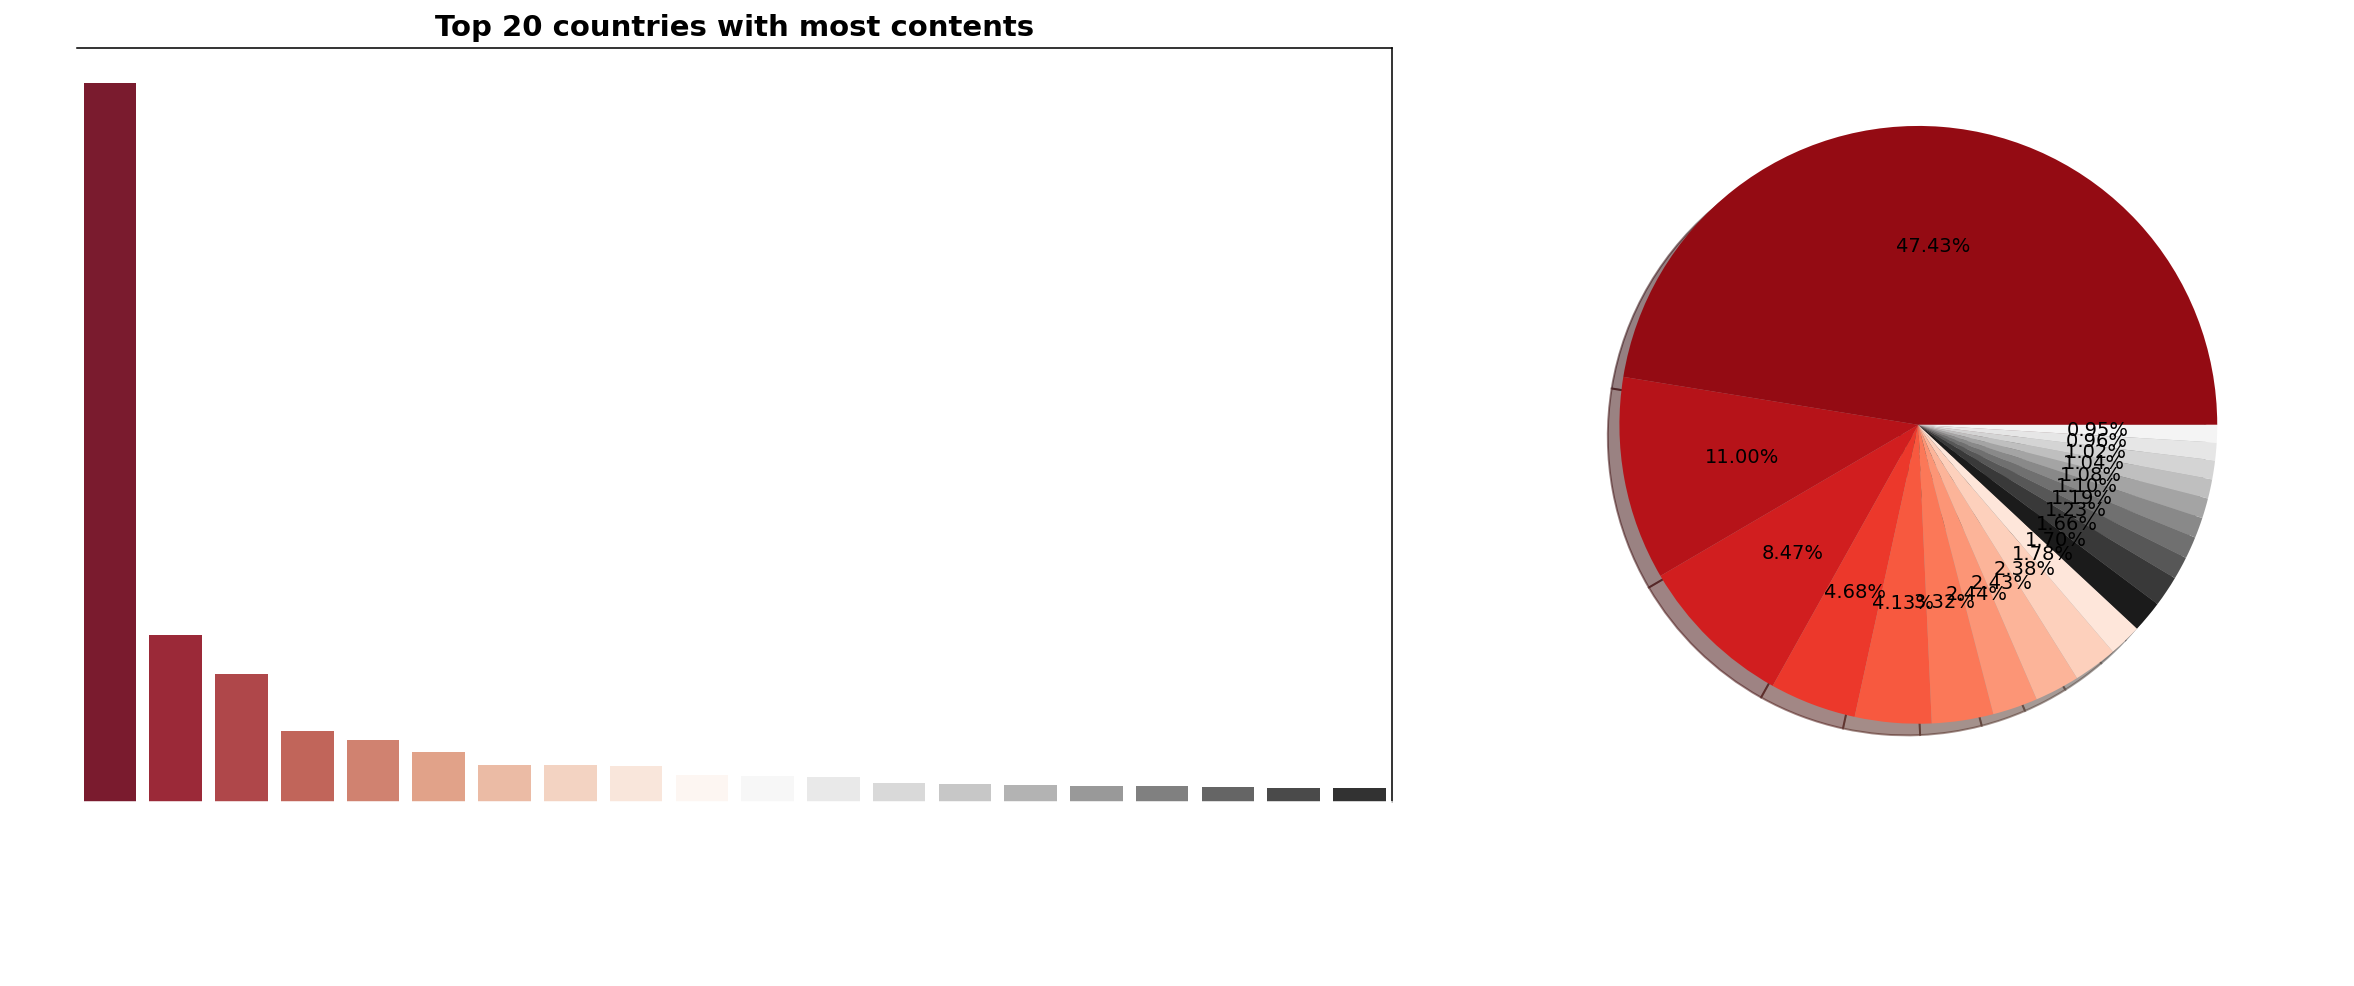

In [13]:
# figure 7
country_data = dff3['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,', ',').replace(
    ', ', ',').split(',')))).sort_values(ascending=False)

top20country = country_count.head(20)


fig = plt.figure(figsize=(20, 7))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[
                       6], width_ratios=[10, 5])

ax71 = plt.subplot(gs[0])
sns.barplot(x=top20country.index, y=top20country, ax=ax71, palette="RdGy")
ax71.set_xticklabels(top20country.index, rotation=90)
ax71.set_title('Top 20 countries with most contents',
               fontsize=15, fontweight='bold')
ax71.tick_params(axis='x', colors='white')
ax71.tick_params(axis='y', colors='white')

ax71.spines['bottom'].set_color('white')
ax71.spines['left'].set_color('white')

ax72 = plt.subplot(gs[1])
red_shades = sns.color_palette("Reds", n_colors=10)
black_shades = sns.color_palette("Greys", n_colors=10)
colors = red_shades[::-1] + black_shades[::-1]

# ax72.pie(top20country, labels=top20country.index, shadow=True, startangle=0, colors=colors,autopct='%1.2f%%')

# ax2.pie(top20country, labels=top20country.index, shadow=True, startangle=0, colors=sns.color_palette("RdGy", n_colors=20),
#      autopct='%1.2f%%')
_, labels, _ = ax72.pie(top20country, labels=top20country.index,
                        shadow=True, startangle=0, colors=colors, autopct='%1.2f%%')
for label in labels:
    label.set_color('white')

ax72.axis('equal')

plt.show()


buf = io.BytesIO()
ax71.get_figure().savefig(buf, format='png')
buf.seek(0)
plot_data71 = base64.b64encode(buf.read()).decode('utf-8')

buf = io.BytesIO()
ax72.get_figure().savefig(buf, format='png')
buf.seek(0)
plot_data72 = base64.b64encode(buf.read()).decode('utf-8')


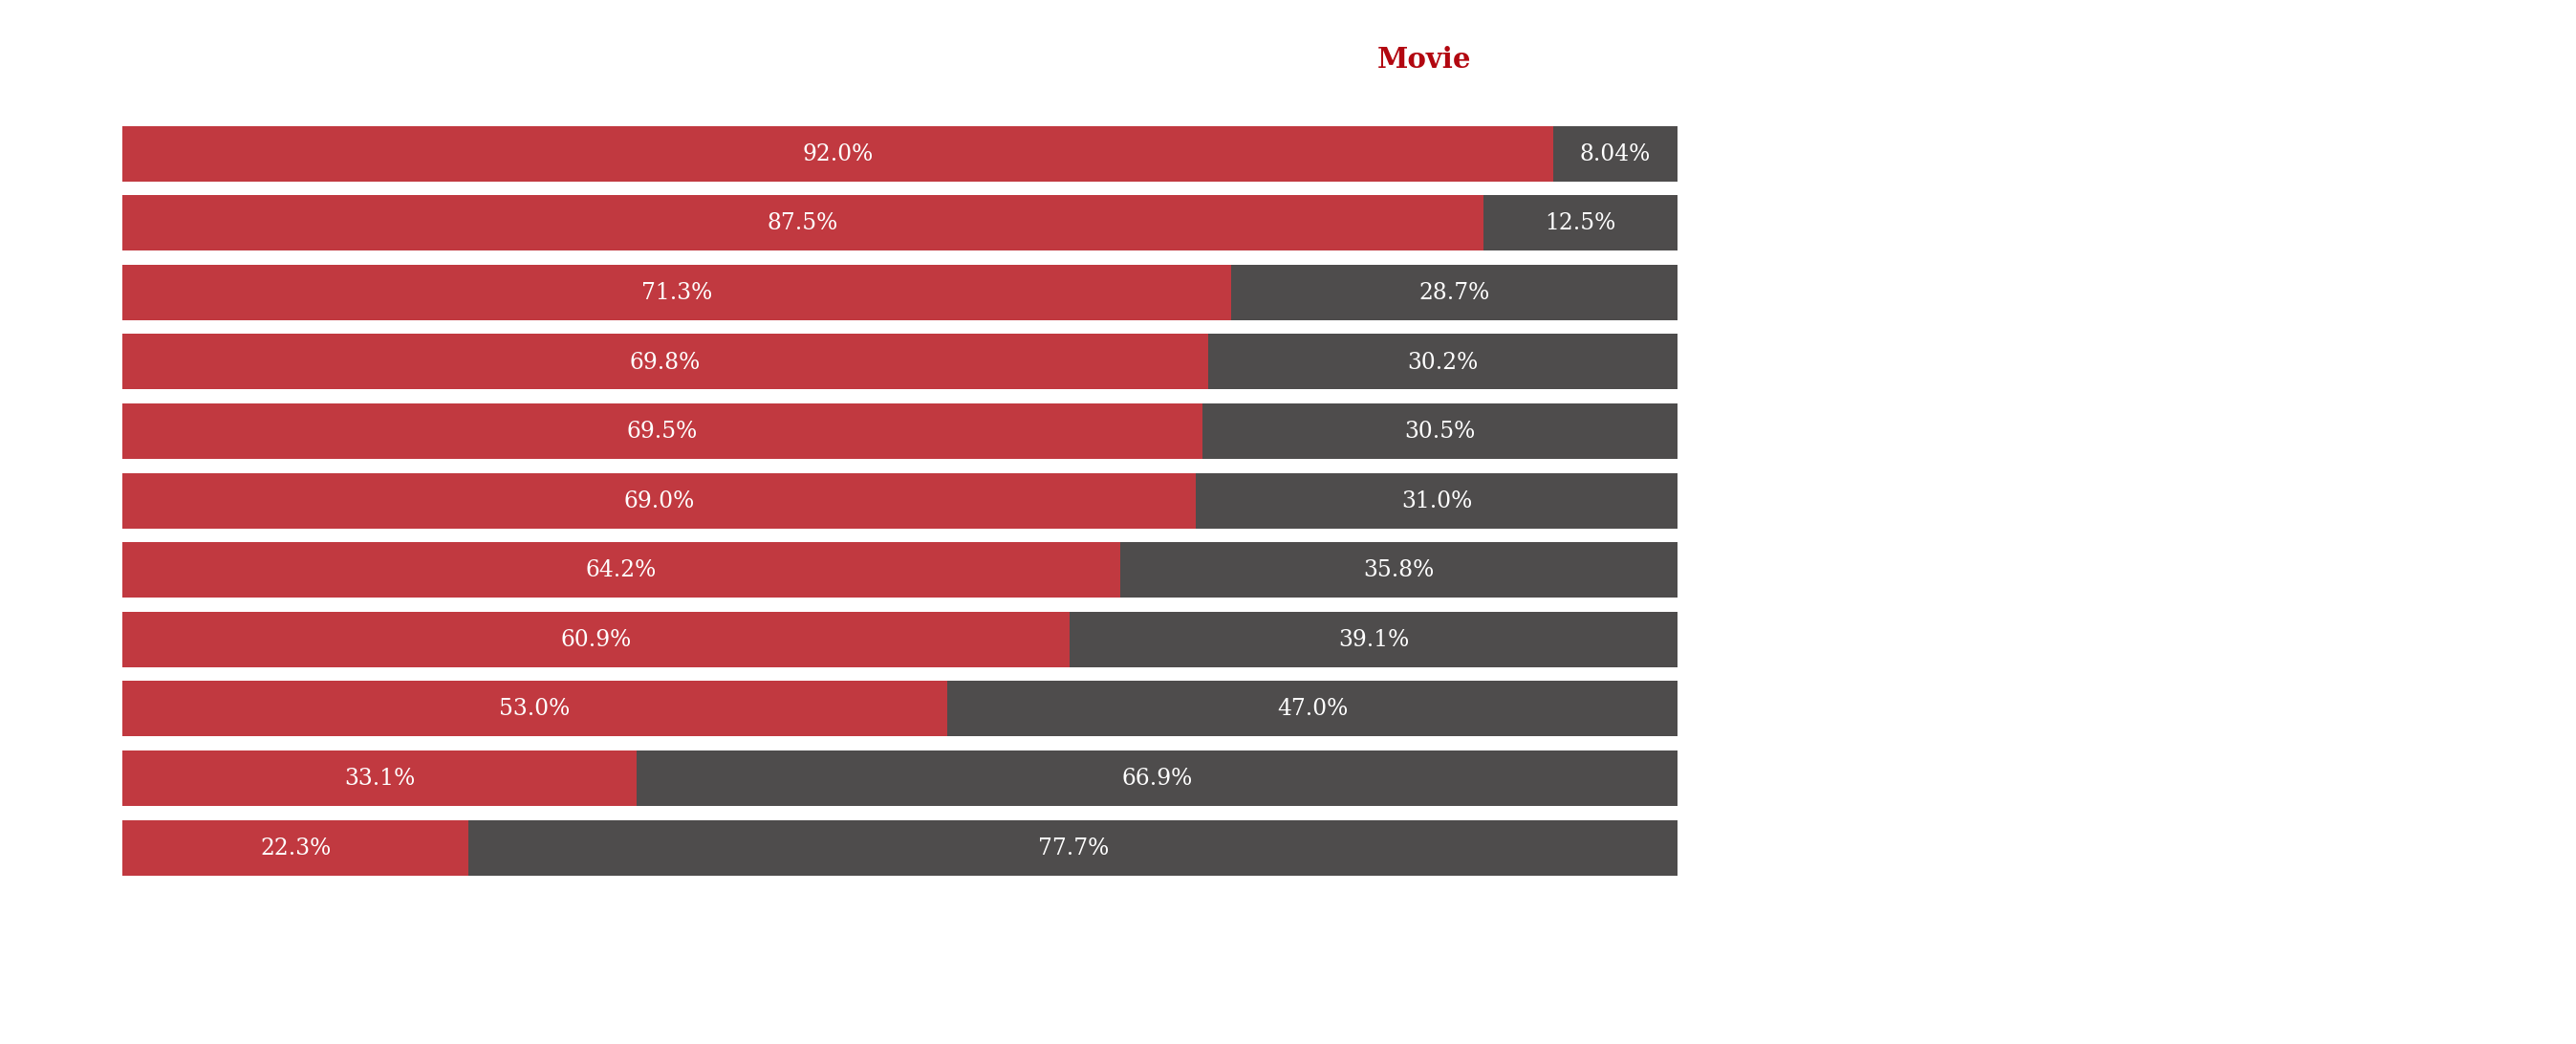

In [14]:
#
# Figure 8
#  Quick feature engineering

# Helper column for various plots
import matplotlib.lines as lines
dff['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
dff['first_country'] = dff['country'].apply(lambda x: x.split(",")[0])
dff['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

dff['target_ages'] = dff['rating'].replace(ratings_ages)
dff['target_ages'].unique()

# Genre

dff['genre'] = dff['listed_in'].apply(
    lambda x:  x.replace(' ,', ',').replace(', ', ',').split(','))

# Reducing name length

dff['first_country'].replace('United States', 'USA', inplace=True)
dff['first_country'].replace('United Kingdom', 'UK', inplace=True)
dff['first_country'].replace('South Korea', 'S. Korea', inplace=True)
country_order = dff['first_country'].value_counts()[:11].index
data_q2q3 = dff[['type', 'first_country']].groupby(
    'first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[[
    'Movie', 'TV Show']].sort_values(by='Movie', ascending=False)[::-1]


###
fig8, ax8 = plt.subplots(1, 1, figsize=(15, 8),)

ax8.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'],
         color='#b20710', alpha=0.8, label='Movie')
ax8.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'],
         color='#221f1f', alpha=0.8, label='TV Show')


ax8.set_xlim(0, 1)
ax8.set_xticks([])
ax8.set_yticklabels(data_q2q3_ratio.index,
                    fontfamily='serif', fontsize=11, color='white')

# male percentage
for i in data_q2q3_ratio.index:
    ax8.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%",
                 xy=(data_q2q3_ratio['Movie'][i]/2, i),
                 va='center', ha='center', fontsize=12, fontweight='light', fontfamily='serif',
                 color='white')

for i in data_q2q3_ratio.index:
    ax8.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%",
                 xy=(data_q2q3_ratio['Movie'][i] +
                     data_q2q3_ratio['TV Show'][i]/2, i),
                 va='center', ha='center', fontsize=12, fontweight='light', fontfamily='serif',
                 color='white')


fig8.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split',
          fontsize=15, fontweight='bold', fontfamily='serif', color='white')
fig8.text(0.131, 0.89, 'Percent Stacked Bar Chart',
          fontsize=12, fontfamily='serif', color='white')

for s in ['top', 'left', 'right', 'bottom']:
    ax8.spines[s].set_visible(False)

# ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig8.text(0.75, 0.9, "Movie", fontweight="bold",
          fontfamily='serif', fontsize=15, color='#b20710')
fig8.text(0.81, 0.9, "|", fontweight="bold",
          fontfamily='serif', fontsize=15, color='white')
fig8.text(0.82, 0.9, "TV Show", fontweight="bold",
          fontfamily='serif', fontsize=15, color='white')


fig8.text(1.1, 0.93, 'Insight', fontsize=15,
          fontweight='bold', fontfamily='serif', color='white')

fig8.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
''', fontsize=12, fontweight='light', fontfamily='serif', color='white')


l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure,
                  figure=fig, color='black', lw=0.2)
fig8.lines.extend([l1])


ax8.tick_params(axis='both', which='major', labelsize=12)
ax8.tick_params(axis=u'both', which=u'both', length=0)

plt.show()

buf = io.BytesIO()
ax8.get_figure().savefig(buf, format='png')
buf.seek(0)
plot_data8 = base64.b64encode(buf.read()).decode('utf-8')


There are 20 types in the Netflix Movie Dataset


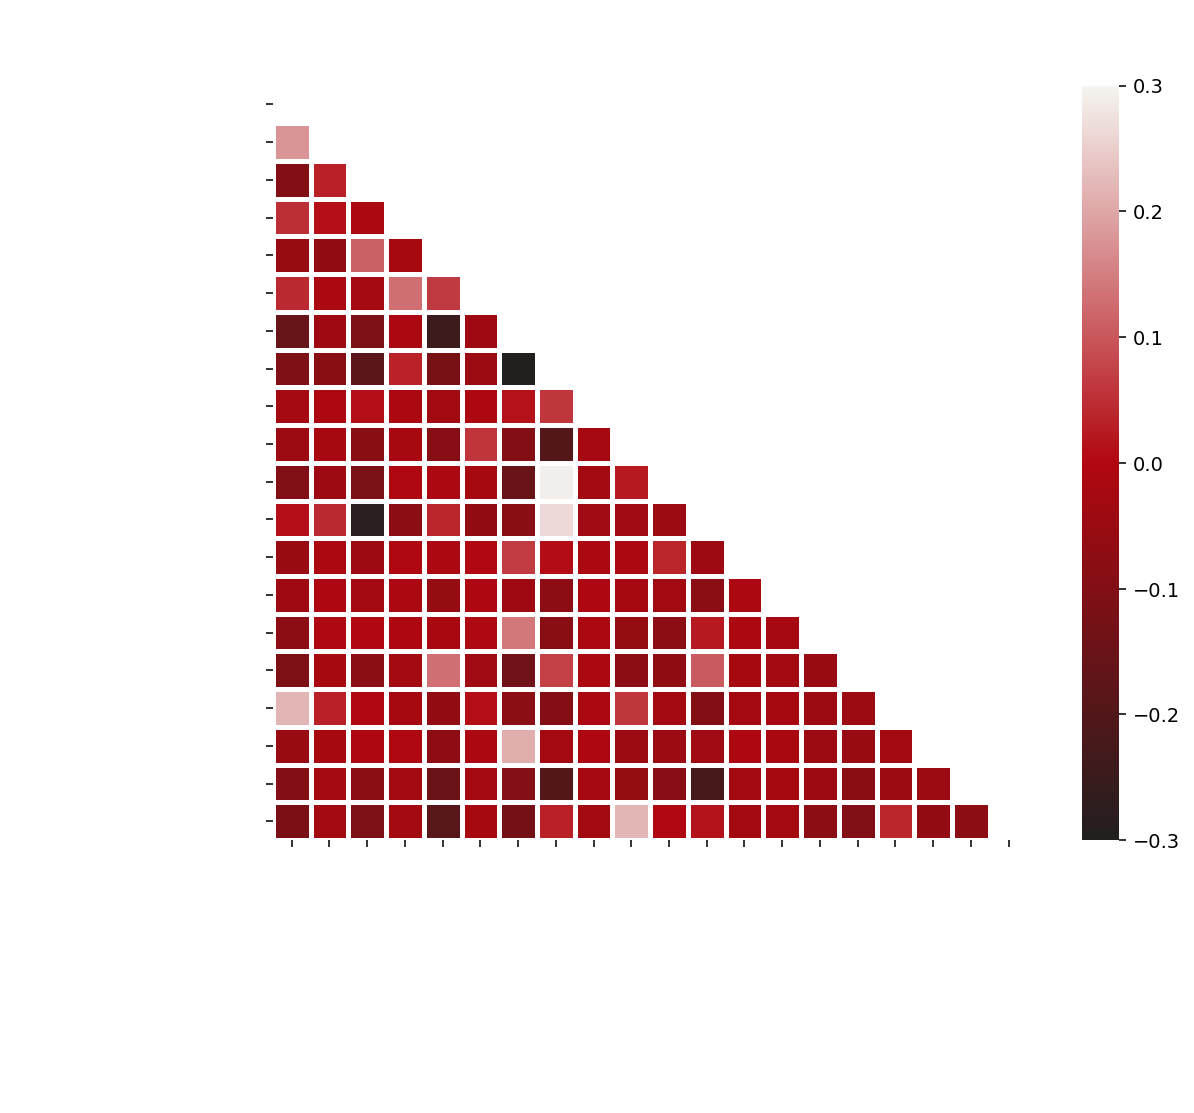

In [15]:
# figure 9

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ['#221f1f', '#b20710', '#f5f5f1'])


def relation_heatmap(df1, title):
    df1['genre'] = df1['listed_in'].apply(
        lambda x:  x.replace(' ,', ',').replace(', ', ',').split(','))
    Types = []
    for i in df1['genre']:
        Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types), title))
    test = df1['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(
        test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax9 = plt.subplots(figsize=(10, 7))
    fig.text(0.13, 0.93, 'Movies Genere Relationship', fontsize=15,
             fontweight='bold', fontfamily='serif', color='white')
    # pl = sns.heatmap(corr, mask=mask, cmap= "RdBu_r", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,
    # cbar_kws={"shrink": 0.6})
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
                     vmin=-.3, center=0, square=True, linewidths=2.5)
    ax9.set_xticklabels(ax9.get_xticklabels(), color='white')
    ax9.set_yticklabels(ax9.get_yticklabels(), color='white')

    plt.show()
    buf = io.BytesIO()
    ax9.get_figure().savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    plot_data9 = base64.b64encode(buf.read()).decode('utf-8')
    return plot_data9


dff3_tv = dff3[dff3["type"] == "TV Show"]
dff3_movies = dff3[dff3["type"] == "Movie"]
plot_data9 = relation_heatmap(dff3_movies, 'Movie')


There are 22 types in the Netflix TV Show Dataset


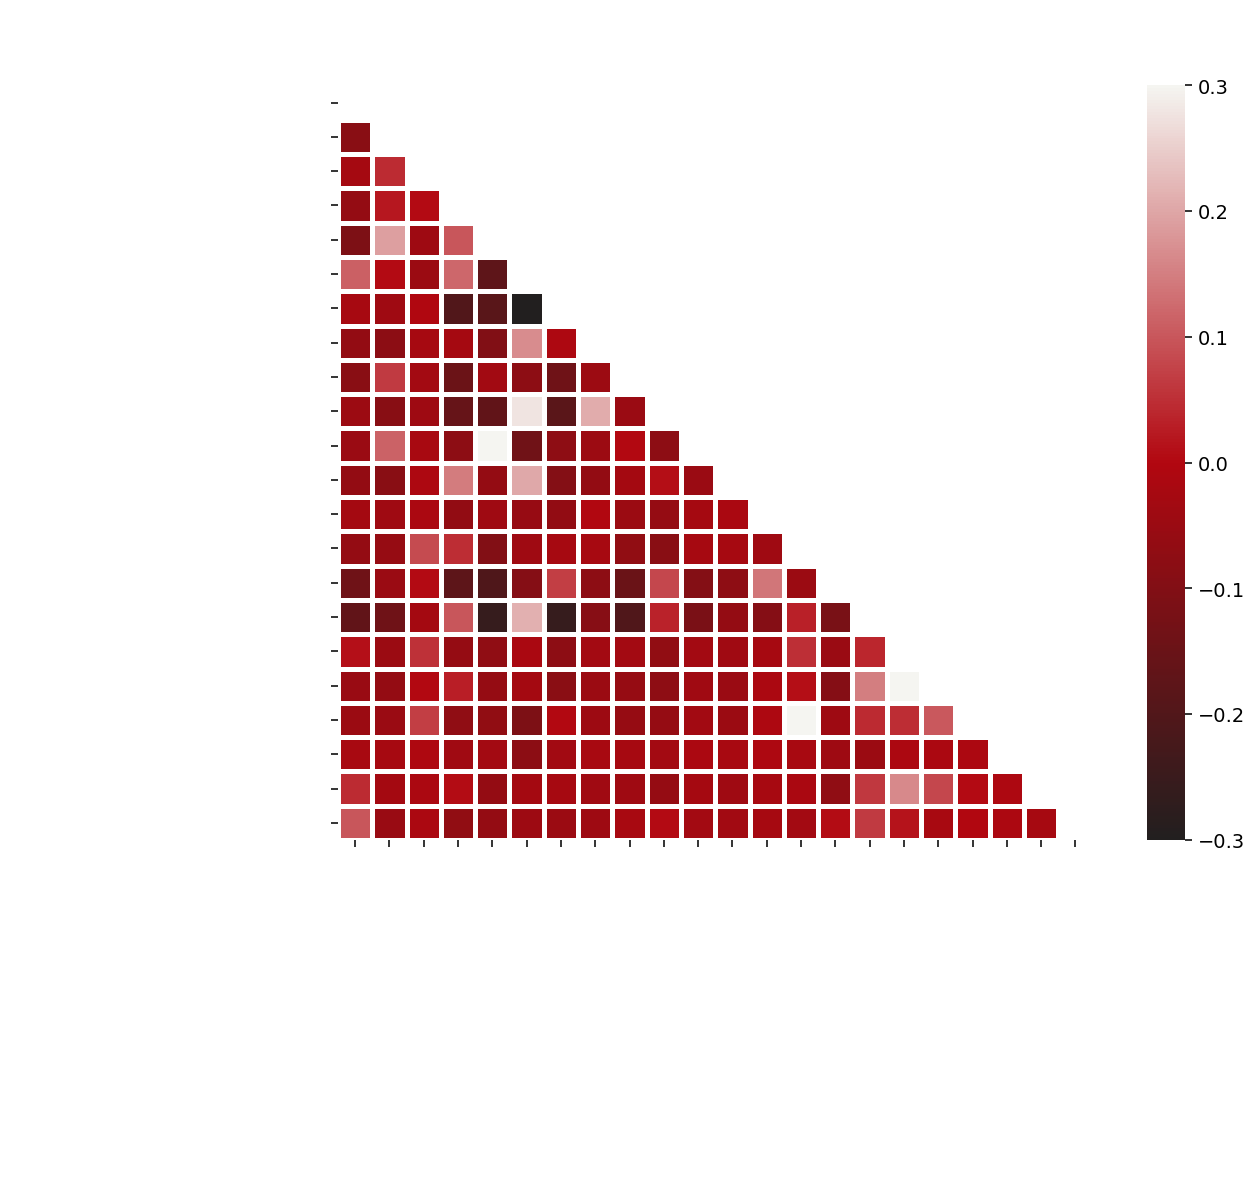

In [16]:
# figure 10
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ['#221f1f', '#b20710', '#f5f5f1'])


def relation_heatmap1(df1, title):
    df1['genre'] = df1['listed_in'].apply(
        lambda x:  x.replace(' ,', ',').replace(', ', ',').split(','))
    Types = []
    for i in df1['genre']:
        Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types), title))
    test = df1['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(
        test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax10 = plt.subplots(figsize=(10, 7))
    fig.text(0.13, 0.93, 'TV Shows Genere Relationship', fontsize=15,
             fontweight='bold', fontfamily='serif', color='white')
    # pl = sns.heatmap(corr, mask=mask, cmap= "RdBu_r", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,
    # cbar_kws={"shrink": 0.6})

    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5
                     )
    ax10.set_xticklabels(ax10.get_xticklabels(), color='white')
    ax10.set_yticklabels(ax10.get_yticklabels(), color='white')

    plt.show()
    buf = io.BytesIO()
    ax10.get_figure().savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    plot_data10 = base64.b64encode(buf.read()).decode('utf-8')
    return plot_data10


plot_data10 = relation_heatmap1(dff3_tv, 'TV Show')


In [17]:
# figure 11
dff1['director'] = dff1['director'].fillna('No Director Specified')
filtered_directors = pd.DataFrame()
filtered_directors = dff1['director'].str.split(',', expand=True).stack()
filtered_directors = filtered_directors.to_frame()
filtered_directors.columns = ['Director']
directors = filtered_directors.groupby(
    ['Director']).size().reset_index(name='Total Content')
directors = directors[directors.Director != 'No Director Specified']
directors = directors.sort_values(by=['Total Content'], ascending=False)
directorsTop5 = directors.head()
directorsTop5 = directorsTop5.sort_values(by=['Total Content'])

fig11 = px.bar(directorsTop5, x='Total Content', y='Director', orientation='h',
               title='Top 5 Directors on Netflix', color='Total Content', color_continuous_scale='reds')

fig11.update_xaxes(showgrid=False)
fig11.update_yaxes(showgrid=False, categoryorder='total ascending',
                   ticksuffix=' ', showline=False)
fig11.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig11.update_layout(margin=dict(t=80, b=0, l=70, r=40),
                    hovermode="y unified",
                    xaxis_title=' ', yaxis_title=" ",
                    plot_bgcolor='#333', paper_bgcolor='#333',
                    title_font=dict(size=25, color='#fff',
                                    family="Lato, sans-serif"),
                    font=dict(color='#fff'),
                    legend=dict(orientation="h", yanchor="bottom",
                                y=1, xanchor="center", x=0.5),
                    hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))


In [18]:
# figure 12

dff1['cast'] = dff1['cast'].fillna('No Cast Specified')
filtered_cast = pd.DataFrame()
filtered_cast = dff1['cast'].str.split(',', expand=True).stack()
filtered_cast = filtered_cast.to_frame()
filtered_cast.columns = ['Actor']
actors = filtered_cast.groupby(
    ['Actor']).size().reset_index(name='Total Content')
actors = actors[actors.Actor != 'No Cast Specified']
actors = actors.sort_values(by=['Total Content'], ascending=False)
actorsTop5 = actors.head()
actorsTop5 = actorsTop5.sort_values(by=['Total Content'])

fig12 = px.bar(actorsTop5, x='Total Content', y='Actor', orientation='h',
               title='Top 5 Actors on Netflix', color='Total Content', color_continuous_scale='reds')

fig12.update_xaxes(showgrid=False)
fig12.update_yaxes(showgrid=False, categoryorder='total ascending',
                   ticksuffix=' ', showline=False)
fig12.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig12.update_layout(margin=dict(t=80, b=0, l=70, r=40),
                    hovermode="y unified",
                    xaxis_title=' ', yaxis_title=" ",
                    plot_bgcolor='#333', paper_bgcolor='#333',
                    title_font=dict(size=25, color='#fff',
                                    family="Lato, sans-serif"),
                    font=dict(color='#fff'),
                    legend=dict(orientation="h", yanchor="bottom",
                                y=1, xanchor="center", x=0.5),
                    hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))


In [19]:
# figure 13
dff3_movies = dff3[dff3["type"] == "Movie"]
duration = dff3_movies['duration'].str.extract('(\d+)').astype(float)

fig13 = px.box(duration, title="Box plot for Movie Durations",
               color_discrete_sequence=['#AA4A44'])
fig13.update_layout(xaxis_title="Movie Duration", yaxis_title="Minutes",
                    plot_bgcolor='#333', paper_bgcolor='#333',
                    font_color='white',font=dict(color='#fff'),)
fig13.show()


In [20]:
# figure 14
# Extract season number and create new column
dff3_tv['season'] = dff3_tv['duration'].str.extract('(\d+)').astype(int)

# Sort dataframe by season number
dff3_tv = dff3_tv.sort_values('season')

# Create a color scale based on the count column
color_scale = px.colors.sequential.Reds[::-1]

fig14 = px.histogram(dff3_tv, x='duration', nbins=50, title='Countplot for Seasons in TV_Shows',
                     color_discrete_sequence=color_scale)
fig14.update_layout(xaxis_title='Season Duration', yaxis_title='Count',
                    plot_bgcolor='#333333', paper_bgcolor='#333', font=dict(color='white'))


fig14.show()


In [21]:
# figure 15
fig15 = go.Figure()
fig15.add_trace(go.Bar(x=((dff3_tv['duration'].value_counts()/dff3_tv.shape[0])*100).index,
                       y=round(
                           ((dff3_tv['duration'].value_counts()/dff3_tv.shape[0])*100), 2).values,
                       marker=dict(color=((dff3_tv['duration'].value_counts()/dff3_tv.shape[0])*100),
                colorscale=color_scale,
                reversescale=True,
                colorbar=dict(title='Count'))))
fig15.update_layout(title='Percentage of Seasons in TV_Shows', xaxis_title='Season Duration',
                    yaxis_title='Percentage', plot_bgcolor='#333333', paper_bgcolor='#333', font=dict(color='white'))

fig15.update_xaxes(tickangle=90)
fig15.show()


In [22]:
# figure 16
# Create a dataframe for top 10 movie genres
df_top10 = dff3_movies['listed_in'].value_counts().head(
    10).to_frame().reset_index()
df_top10.columns = ['Genre', 'Count']

# Sort dataframe by count
df_top10 = df_top10.sort_values('Count', ascending=False)

# Create a color scale based on the count column
color_scale = px.colors.sequential.Reds[::-1]

# Create the bar plot
# Create the bar plot
fig16 = px.bar(df_top10, x='Genre', y='Count', color='Count', color_continuous_scale=color_scale,
               title='Top 10 Genres in Movies', labels={'Genre': 'Genre', 'Count': 'Count'})

fig16.update_layout(xaxis_tickangle=-45, yaxis_title='Count', coloraxis_colorbar_title='Count',
                    plot_bgcolor='#333', paper_bgcolor='#333',
                    font=dict(color='white'))

fig16.show()


In [23]:
# #figure 17
# dff3['cast_name'] = dff3['cast'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
# cast_count = []
# for i in dff3['cast_name']:
#     cast_count += i

# cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

# dff3_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
#     columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]

# color_scale = px.colors.sequential.Reds[::-1]

# fig17 = px.bar(dff3_cast_count, x='cast_name', y='count', color='count', color_continuous_scale=color_scale,
#                title='Top 20 Artists on Netflix', labels={'cast_name': 'Artist', 'count': 'Count'})
# fig17.update_layout(xaxis_tickangle=-45, yaxis_title='Count', coloraxis_colorbar_title='Count', plot_bgcolor='#333333',paper_bgcolor='#333',
#                      font=dict(color='white'))
# fig17.show()


In [24]:
# figure 18
df_genre = pd.DataFrame(dff2.genre.value_counts()).reset_index().rename(
    columns={'index': 'genre', 'genre': 'genre_count'})

print(df_genre.head())

# Create the treemap
fig_tree = px.treemap(df_genre, path=['genre_count'], values='count')
    
fig_tree.update_layout(title='Highest watched Geners on Netflix',
                       margin=dict(t=50, b=0, l=70, r=40),
                       plot_bgcolor='#333', paper_bgcolor='#333',
                       title_font=dict(size=25, color='#fff',
                                       family="Lato, sans-serif"),
                       font=dict(color='#fff'),
                       hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))


              genre_count  count
0                  Dramas   1600
1                Comedies   1210
2      Action & Adventure    859
3           Documentaries    829
4  International TV Shows    774


In [25]:
# figure 19
df1 = dff1[['type', 'release_year']]
df1 = df1.rename(columns={"release_year": "Release Year"})
df2 = df1.groupby(['Release Year', 'type']).size(
).reset_index(name='Total Content')
df2 = df2[df2['Release Year'] >= 2010]
fig19 = px.line(df2, x="Release Year", y="Total Content", color='type',
                title='Trend of content produced over the years on Netflix')
fig19.update_layout(xaxis=dict(title='Release Year',
                               tickmode='linear', tick0=2010, dtick=1),
                    yaxis=dict(title='Total Content'),
                    legend=dict(orientation="h", yanchor="bottom",
                                y=1, xanchor="center", x=0.5),
                    hoverlabel=dict(bgcolor="black", font_size=13,
                                    font_family="Lato, sans-serif"),
                    plot_bgcolor='#333', paper_bgcolor='#333',
                    title_font=dict(size=25, color='#fff',
                                       family="Lato, sans-serif"),
                       font=dict(color='#fff'),
                    margin=dict(t=80, b=0, l=70, r=40))
fig19.show()


In [26]:
# figure 20
d2 = dff2[dff2["type"] == "Movie"]
# We will create a data frame where we will show how many movies were released each year.

col = 'year_added'

vc2 = d2[col].value_counts().reset_index().rename(
    columns={col: col, "index": col})

print(vc2.head())
vc2['percent'] = vc2['count'].apply(lambda x: 100*x/sum(vc2['count']))
print(vc2.head())
vc2 = vc2.sort_values(col)
fig20 = go.Figure(go.Waterfall(
    name="Movie", orientation="v",
    x=vc2['year_added'].values,
    textposition="auto",
    text=["1", "2", "1", "13", "3", "6", "14", "48",
          "204", "743", "1121", "1366", "1228", "84"],
    y=[1, 2, -1, 13, -3, 6, 14, 48, 204, 743, 1121, 1366, -1228, -84],
    connector={"line": {"color": "#b20710"}},
    increasing={"marker": {"color": "#b20710"}},
    decreasing={"marker": {"color": "orange"}},
))

# Set plot and paper background colors, and font color
fig20.update_layout(
    plot_bgcolor='#333333',
    paper_bgcolor='#333',
    font=dict(color='white'),
    title="How many movies were released over the years with a waterfall chart",
    xaxis_title="Release Year",
    yaxis_title="Total Count",
)

fig20.show()


   year_added  count
0      2019.0   1424
1      2020.0   1284
2      2018.0   1237
3      2021.0    993
4      2017.0    839
   year_added  count    percent
0      2019.0   1424  23.226227
1      2020.0   1284  20.942750
2      2018.0   1237  20.176154
3      2021.0    993  16.196379
4      2017.0    839  13.684554


In [27]:
# figure 21
d1 = dff2[dff2["type"] == "TV Show"]
d2 = dff2[dff2["type"] == "Movie"]
col = "year_added"
vc1 = d1[col].value_counts().reset_index().rename(
    columns={col: col, "index": col})
vc1['percent'] = vc1['count'].apply(lambda x: 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)
vc2 = d2[col].value_counts().reset_index().rename(
    columns={col: col, "index": col})
vc2['percent'] = vc2['count'].apply(lambda x: 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)
trace1 = go.Scatter(x=vc1[col], y=vc1["count"],
                    name="TV Shows", marker=dict(color="orange"), )
trace2 = go.Scatter(x=vc2[col], y=vc2["count"],
                    name="Movies", marker=dict(color="#b20710"))
data = [trace1, trace2]
fig_line = go.Figure(data)
fig_line.update_traces(hovertemplate=None)
fig_line.update_xaxes(showgrid=False)
fig_line.update_yaxes(showgrid=False)
large_title_format = 'Tv Show and Movies impact over the Year'
small_title_format = "Due to Covid updatation of content is slowed."
fig_line.update_layout(title=large_title_format + " " + small_title_format,
                       height=400, margin=dict(t=130, b=0, l=70, r=40),
                       hovermode="x unified", xaxis_title=' ',
                       yaxis_title=" ", plot_bgcolor='#333', paper_bgcolor='#333',
                       title_font=dict(size=25, color='#fff',
                                       family="Lato, sans-serif"),
                       font=dict(color='#fff'),
                       legend=dict(orientation="h",
                                   yanchor="bottom",
                                   y=1,
                                   xanchor="center",
                                   x=0.5))
fig_line.add_annotation(dict
                        (x=0.8,
                         y=0.3,
                         ax=0,
                         ay=0,
                         xref="paper",
                         yref="paper",
                         text="Highest number of Tv Shows were released in 2019 followed by 2017."))
fig_line.add_annotation(dict
                        (x=0.9,
                         y=1,
                         ax=0,
                         ay=0,
                         xref="paper",
                         yref="paper",
                         text="Highest number of Movies were relased in 2019 followed by 2020"))
fig_line.show()


In [28]:
# figure 22
df1_tv = dff3[dff3["type"] == "TV Show"]
df1_movies = dff3[dff3["type"] == "Movie"]

df1_content = dff3['year_added'].value_counts().reset_index().rename(columns={
    'year_added': 'year_added', 'index': 'year_added'}).sort_values('year_added')
df1_content['percent'] = df1_content['count'].apply(
    lambda x: 100*x/sum(df1_content['count']))


df1_tv1 = df1_tv['year_added'].value_counts().reset_index().rename(columns={
    'year_added': 'year_added', 'index': 'year_added'}).sort_values('year_added')
df1_tv1['percent'] = df1_tv1['count'].apply(
    lambda x: 100*x/sum(df1_tv1['count']))


df1_movies1 = df1_movies['year_added'].value_counts().reset_index().rename(columns={
    'year_added': 'year_added', 'index': 'year_added'}).sort_values('year_added')
df1_movies1['percent'] = df1_movies1['count'].apply(
    lambda x: 100*x/sum(df1_movies1['count']))

t1 = go.Scatter(x=df1_movies1['year_added'], y=df1_movies1["count"],
                name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df1_tv1['year_added'], y=df1_tv1["count"],
                name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df1_content['year_added'], y=df1_content["count"],
                name="Total Contents", marker=dict(color="brown"))

data = [t1, t2, t3]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"),
                   plot_bgcolor='#333333', paper_bgcolor='#333333', font=dict(color='white'))

# layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig22 = go.Figure(data, layout=layout)
fig22.show()


In [29]:
# figure 23
df1_content = dff3[['month_added', 'month_name_added']].value_counts().reset_index().rename(columns={
    0: 'count'}).sort_values('month_added').drop('month_added', axis=1)
df1_content['percent'] = df1_content['count'].apply(
    lambda x: 100*x/sum(df1_content['count']))


df1_tv2 = df1_tv[['month_added', 'month_name_added']].value_counts().reset_index().rename(columns={
    0: 'count'}).sort_values('month_added').drop('month_added', axis=1)
df1_tv2['percent'] = df1_tv2['count'].apply(
    lambda x: 100*x/sum(df1_tv2['count']))


df1_movies2 = df1_movies[['month_added', 'month_name_added']].value_counts().reset_index().rename(columns={
    0: 'count'}).sort_values('month_added').drop('month_added', axis=1)
df1_movies2['percent'] = df1_movies2['count'].apply(
    lambda x: 100*x/sum(df1_movies2['count']))

t1 = go.Scatter(x=df1_movies2['month_name_added'],
                y=df1_movies2["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df1_tv2['month_name_added'], y=df1_tv2["count"],
                name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df1_content['month_name_added'], y=df1_content["count"],
                name="Total Contents", marker=dict(color="Brown"))


data = [t1, t2, t3]
layout = go.Layout(title="Content added over the months ", legend=dict(x=0.1, y=1.1, orientation="h"),
                   plot_bgcolor='#333333', paper_bgcolor='#333333', font=dict(color='white'))

# layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig23 = go.Figure(data, layout=layout)
fig23.show()


In [30]:
z = dff1.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.update_layout(
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.1,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=80, b=0, l=0, r=40),
    title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
    font=dict(color='#fff'),
    plot_bgcolor='#333', paper_bgcolor='#333',
    hoverlabel=dict(bgcolor="black", font_size=13,
                    font_family="Lato, sans-serif")
)


In [31]:
# figure 25
df_rating = pd.DataFrame(dff2['rating'].value_counts()).reset_index().rename(
    columns={'index': 'rating', 'rating': 'rating'})

fig_bar = px.bar(df_rating, y='rating', x='count', title='Distribution of Rating',

                 color_discrete_sequence=['#b20710'], text='count')

fig_bar.update_xaxes(showgrid=False)

fig_bar.update_yaxes(
    showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)

fig_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig_bar.update_layout(margin=dict(t=80, b=0, l=70, r=40),

                      hovermode="y unified",

                      xaxis_title=' ', yaxis_title=" ", height=450,

                      plot_bgcolor='#333', paper_bgcolor='#333',

                      title_font=dict(size=25, color='#fff',
                                      family="Lato, sans-serif"),

                      font=dict(color='#fff'),

                      legend=dict(orientation="h", yanchor="bottom",
                                  y=1, xanchor="center", x=0.5),

                      hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))


In [32]:
# Quick feature engineering

# Helper column for various plots
dff['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
dff['first_country'] = dff['country'].apply(lambda x: x.split(",")[0])
dff['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

dff['target_ages'] = dff['rating'].replace(ratings_ages)
dff['target_ages'].unique()

# Genre

dff['genre'] = dff['listed_in'].apply(
    lambda x:  x.replace(' ,', ',').replace(', ', ',').split(','))

# Reducing name length

dff['first_country'].replace('United States', 'USA', inplace=True)
dff['first_country'].replace('United Kingdom', 'UK', inplace=True)
dff['first_country'].replace('South Korea', 'S. Korea', inplace=True)


# data = dff.groupby('first_country')[['first_country', 'count']].sum(
# ).sort_values(by='count', ascending=False).reset_index()[:10]
# data = data['first_country']
# Grouping by 'first_country' and summing 'count'
data = dff.groupby('first_country', as_index=False)['count'].sum()

# Sorting and getting top 10 countries
data = data.sort_values(by='count', ascending=False).head(10)

# Extracting the list of top countries
data = data['first_country']


df_heatmap = dff.loc[dff['first_country'].isin(data)]
df_heatmap = pd.crosstab(
    df_heatmap['first_country'], df_heatmap['target_ages'], normalize="index").T


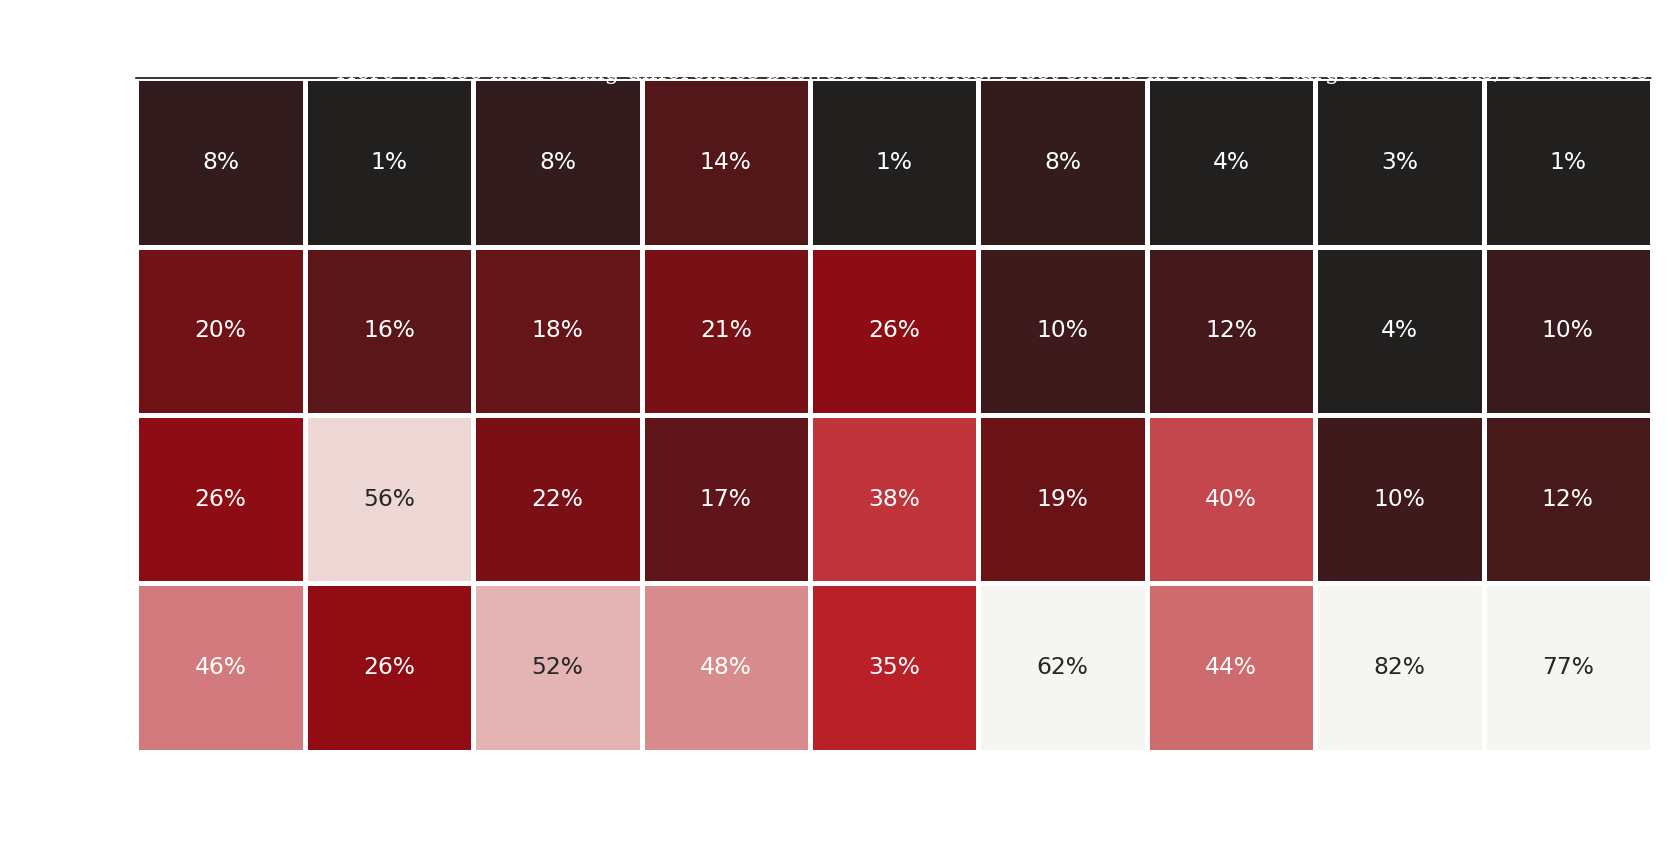

In [33]:
# figure 26
data = dff.groupby('first_country', as_index=False)['count'].sum()

# Sorting and getting top 10 countries
data = data.sort_values(by='count', ascending=False).head(10)

# Extracting the list of top countries
data = data['first_country']


df_heatmap = dff.loc[dff['first_country'].isin(data)]
df_heatmap = pd.crosstab(
    df_heatmap['first_country'], df_heatmap['target_ages'], normalize="index").T
fig26, ax26 = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain',
                  'Mexico']

age_order = ['Kids', 'Older Kids', 'Teens', 'Adults']

sns.heatmap(df_heatmap.loc[age_order, country_order2], cmap=cmap, square=True, linewidth=2.5, cbar=False,
            annot=True, fmt='1.0%', vmax=.6, vmin=0.05, ax=ax26, annot_kws={"fontsize": 12})

ax26.spines['top'].set_visible(True)


fig26.text(.99, .725, 'Target ages proportion of total content by country',
           fontweight='bold', fontfamily='serif', fontsize=15, ha='right', color='white')
fig26.text(0.99, 0.7, 'Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.',
           ha='right', fontsize=12, fontfamily='serif', color='white')

ax26.set_yticklabels(ax26.get_yticklabels(), fontfamily='serif',
                     rotation=0, fontsize=11, color='white')
ax26.set_xticklabels(ax26.get_xticklabels(), fontfamily='serif',
                     rotation=90, fontsize=11, color='white')

ax26.set_ylabel('')
ax26.set_xlabel('')
ax26.tick_params(axis=u'both', which=u'both', length=0)

#ax26.get_figure().savefig(buf, format='png', bbox_inches='tight')
plt.tight_layout()
plt.show()

buf = io.BytesIO()
ax26.get_figure().savefig(buf, format='png',bbox_inches='tight')
buf.seek(0)
plot_data26 = base64.b64encode(buf.read()).decode('utf-8')


In [34]:
# figure 27
# making a copy of df
dff4 = dff2.copy()
# making 2 df one for tv show and another for movie with rating
# print(dff4.head())
df_tv_show = dff4[dff4['type'] == 'TV Show'][[
    'rating', 'type']].rename(columns={'type': 'tv_show'})
print(df_tv_show.head())
df_movie = dff4[dff4['type'] == 'Movie'][['rating', 'type']].rename(columns={
                                                                    'type': 'movie'})
df_tv_show = pd.DataFrame(df_tv_show.rating.value_counts(
)).reset_index().rename(columns={'index': 'tv_show'})
# print(df_tv_show.head())
df_tv_show['rating_final'] = df_tv_show['rating']
# making rating column value negative
df_tv_show['rating'] *= -1
df_movie = pd.DataFrame(df_movie.rating.value_counts()
                        ).reset_index().rename(columns={'index': 'movie'})

fig27 = make_subplots(rows=1, cols=2, specs=[
                      [{}, {}]], shared_yaxes=True, horizontal_spacing=0)
# bar plot for tv shows
print(df_tv_show.head())
fig27.append_trace(go.Bar(x=df_tv_show.rating_final, y=df_tv_show['count'], orientation='h', showlegend=True,
                          text=df_tv_show.rating_final, name='TV Show', marker_color='#221f1f'), 1, 1)
# bar plot for movies
# print(df_movie.head())
fig27.append_trace(go.Bar(x=df_movie.rating, y=df_movie['count'], orientation='h', showlegend=True, text=df_movie.rating,
                          name='Movie', marker_color='#b20710'), 1, 2)
fig27.update_xaxes(showgrid=False)
fig27.update_yaxes(showgrid=False, categoryorder='total ascending',
                   ticksuffix=' ', showline=False)
fig27.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig27.update_layout(title='Which has the highest rating TV shows or Movies?',
                    margin=dict(t=80, b=0, l=70, r=40),
                    hovermode="y unified",
                    xaxis_title=' ', yaxis_title=" ",
                    plot_bgcolor='#333', paper_bgcolor='#333',
                    title_font=dict(size=25, color='#fff',
                                    family="Lato, sans-serif"),
                    font=dict(color='#fff'),
                    legend=dict(orientation="h", yanchor="bottom",
                                y=1, xanchor="center", x=0.5),
                    hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))
fig27.add_annotation(dict(x=0.81, y=0.6, ax=0, ay=0,
                          xref="paper", yref="paper",
                          text="97% people prefer Movies over TV Shows on Netflix"

                          ))
fig27.add_annotation(dict(x=0.2, y=0.2, ax=0, ay=0,
                          xref="paper", yref="paper",
                          text="3% people prefer TV Shows on Netflix"
                          ))


  rating  tv_show
1  TV-MA  TV Show
2  TV-MA  TV Show
3  TV-MA  TV Show
4  TV-MA  TV Show
5  TV-MA  TV Show
  rating  count rating_final
0          1145        TV-MA
1           733        TV-14
2           323        TV-PG
3           195        TV-Y7
4           176         TV-Y


In [35]:
# figure 28
# print(dff2.head())
# corrs = dff2.corr()
numeric_df = dff2.select_dtypes(include=['number'])

# Compute the correlation matrix
corrs = numeric_df.corr()
fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title='Correlation of whole Data',
                          plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                          title_font=dict(size=25, color='#fff',
                                          family="Muli, sans-serif"),
                          font=dict(color='#fff'))


In [36]:
# figure 29
# print(dff2.month_added)
df_month = pd.DataFrame(dff2.month_added.value_counts()).reset_index().rename(
    columns={'index': 'month', 'month_added': 'month'})
# converting month number to month name
# print(df_month)
df_month['month_final'] = df_month['month'].replace(
    {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
# df_month[:2]
fig_month = px.funnel(df_month, x='count', y='month_final', title='Best month for releasing Content',
                      color_discrete_sequence=['#b20710'])
fig_month.update_xaxes(showgrid=False, ticksuffix=' ', showline=True)
fig_month.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_month.update_layout(margin=dict(t=60, b=20, l=70, r=40),
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#333', paper_bgcolor='#333',
                        title_font=dict(size=25, color='#fff',
                                        family="Lato, sans-serif"),
                        font=dict(color='#fff'),
                        hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))


In [37]:
# figure 30
from textblob import TextBlob
dfx = dff1[['release_year', 'description']]
dfx = dfx.rename(columns={'release_year': 'Release Year'})

for index, row in dfx.iterrows():
    z = row['description']
    testimonial = TextBlob(z)
    p = testimonial.sentiment.polarity

    if p == 0:
        sent = 'Neutral'
    elif p > 0:
        sent = 'Positive'
    else:
        sent = 'Negative'

    dfx.loc[[index, 2], 'Sentiment'] = sent

dfx = dfx.groupby(['Release Year', 'Sentiment']
                  ).size().reset_index(name='Total Content')
dfx = dfx[dfx['Release Year'] >= 2010]

fig29 = px.bar(dfx, x='Release Year', y='Total Content',
               color='Sentiment', title='Sentiment of content on Netflix')
fig29.update_layout(title_font=dict(size=25, color='#fff', family='Lato, sans-serif'),
                    font=dict(color='#fff'),
                    legend=dict(orientation='h', yanchor='bottom',
                                y=1, xanchor='center', x=0.5),
                    xaxis=dict(title=dict(text='Release Year',
                               font=dict(color='#8a8d93')), showgrid=False),
                    yaxis=dict(title=dict(text='Total Content',
                               font=dict(color='#8a8d93')), showgrid=False),
                    plot_bgcolor='#333', paper_bgcolor='#333')
fig29.show()


In [38]:
# !pip install textblob

In [39]:
# figure 32
# Create a line plot using Plotly
fig32 = px.line(r_df, x="Years",
                y="Revenue generated by subscription", color="Area")

# Customize the plot
fig32.update_layout(title="Revenue Generated by Subscription for Netflix", xaxis_title="Years", yaxis_title="Revenue (in millions)", plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                          title_font=dict(size=25, color='#fff',
                                          family="Muli, sans-serif"),
                          font=dict(color='#fff'))

# Show the plot
fig32.show()


In [40]:
# figure33


In [41]:
# figure 34
# Create the slider component
slider = dcc.Slider(
    id="slider",
    min=3,
    max=30,
    step=1,
    value=10,
    marks={
        str(i): str(i)
        for i in range(3, 31, 3)
    }
)


In [42]:
# figure 35
# Define options for dropdown list
dropdown_options = [{'label': 'Movies', 'value': 'movies'}, {
    'label': 'TV Shows', 'value': 'shows'}]


In [43]:
#figure 36
import ast 
# load the CSV file into a pandas dataframe
tf = pd.read_csv('tmdb_5000_movies.csv')



# define the genre options
genre_options = [{'label': g['name'], 'value': g['id']} for genres in tf['genres'].unique() for g in eval(genres)]
genre_options = [dict(s) for s in set(frozenset(d.items()) for d in genre_options)]



# convert the strings to dictionaries
tf['production_countries'] = tf['production_countries'].apply(ast.literal_eval)

# get a list of all the unique country codes
unique_countries = []
for country_list in tf['production_countries']:
    for country in country_list:
        if country['iso_3166_1'] not in unique_countries:
            unique_countries.append(country['iso_3166_1'])

# create a list of dictionaries for the drop-down options
country_options_36 = [{'label': country_code, 'value': country_code} for country_code in unique_countries]



In [44]:
# recommendation system:
def fetch_poster(movie_id):
    url = "https://api.themoviedb.org/3/movie/{}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US".format(
        movie_id)
    data = requests.get(url)
    data = data.json()
    poster_path = data['poster_path']
    full_path = "https://image.tmdb.org/t/p/w500/" + poster_path
    return full_path


def recommend(movie):
    index = movies[movies['title'] == movie].index[0]
    distances = sorted(
        list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommended_movie_names = []
    recommended_movie_posters = []
    for i in distances[1:6]:
        # fetch the movie poster
        movie_id = movies.iloc[i[0]].movie_id
        recommended_movie_posters.append(fetch_poster(movie_id))
        recommended_movie_names.append(movies.iloc[i[0]].title)

    return recommended_movie_names, recommended_movie_posters


movies = pickle.load(open('movie_list.pkl', 'rb'))
similarity = pickle.load(open('similarity.pkl', 'rb'))

options = [{'label': movie, 'value': movie} for movie in movies['title']]
default_movie = options[0]['value']


ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'

In [47]:
#our team page 

from dash import Dash, html
import base64
from PIL import Image
from io import BytesIO

# Using Pillow to read the the image
with open("divyesh.jpeg", "rb") as f:
    img_bytes1 = f.read()
pil_img1 = Image.open(BytesIO(img_bytes1))

# Convert Pillow image to base64-encoded string
buffered = BytesIO()
pil_img1.save(buffered, format="JPEG")
img_str1 = base64.b64encode(buffered.getvalue()).decode("ascii")


# Using Pillow to read the the image
with open("divyesh.jpeg", "rb") as f:
    img_bytes2 = f.read()
pil_img2 = Image.open(BytesIO(img_bytes2))

# Convert Pillow image to base64-encoded string
buffered = BytesIO()
pil_img2.save(buffered, format="JPEG")
img_str2 = base64.b64encode(buffered.getvalue()).decode("ascii")


# Using Pillow to read the the image
with open("divyesh.jpeg", "rb") as f:
    img_bytes3 = f.read()
pil_img3 = Image.open(BytesIO(img_bytes3))

# Convert Pillow image to base64-encoded string
buffered = BytesIO()
pil_img3.save(buffered, format="JPEG")
img_str3 = base64.b64encode(buffered.getvalue()).decode("ascii")


# Using Pillow to read the the image
with open("divyesh.jpeg", "rb") as f:
    img_bytes4 = f.read()
pil_img4 = Image.open(BytesIO(img_bytes4))

# Convert Pillow image to base64-encoded string
buffered = BytesIO()
pil_img4.save(buffered, format="JPEG")
img_str4 = base64.b64encode(buffered.getvalue()).decode("ascii")


# Using Pillow to read the the image
with open("divyesh.jpeg", "rb") as f:
    img_bytes5 = f.read()
pil_img5 = Image.open(BytesIO(img_bytes5))

# Convert Pillow image to base64-encoded string
buffered = BytesIO()
pil_img5.save(buffered, format="JPEG")
img_str5 = base64.b64encode(buffered.getvalue()).decode("ascii")

In [48]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.CYBORG],
                meta_tags=[{'name': 'viewport',
                            'content': 'width=device-width, initial-scale=1.0'}]
                )

app.css.append_css(
    {'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'})


In [49]:

tabs_styles = {
    'height': '44px'
}
tab_style = {
    'borderBottom': '1px solid #d6d6d6',
    'padding': '6px',
    'fontWeight': 'bold',
    'backgroundColor': '#333',



}
tab_selected_style = {
    'borderTop': '1px solid #d6d6d6',
    'borderBottom': '1px solid #d6d6d6',
    'backgroundColor': '#990000',
    'color': '#d6d6d6',
    'padding': '6px'
}

app.layout = dbc.Container([
    dbc.Row([
        # dbc.Col(html.H1("Netflix Data Analysis",
        #         className="text-center text-danger , mb-4"), width=12)
        html.Div([

            html.Div([
                html.H1("Netflix Data Analysis",
                        className="text-center text-danger")
            ], style={'text-align': 'center', 'color': '#E50914', 'font-size': '40px', 'background-color': 'black'}
            ),


            html.Iframe(
                src='https://media.tenor.com/NerN41mjgV0AAAAC/netflix-intro.gif',
                style={
                    'width': '499px',
                    'height': '280px',
                    'margin': '0 auto',
                    'display': 'block',
                    'background-color': 'black',
                }
            )

        ], style={'background-color': 'black'})


    ]),
    html.Br(),
    dbc.Row([
        dcc.Tabs(id="tabs-styled-with-inline", value='tab-1', children=[
            dcc.Tab(label='Netflix Audience', value='tab-1', style=tab_style,
                    selected_style=tab_selected_style),
            dcc.Tab(label='Content Creators', value='tab-2', style=tab_style,
                    selected_style=tab_selected_style),
            dcc.Tab(label='Netflix 360', value='tab-3', style=tab_style,
                    selected_style=tab_selected_style),
            dcc.Tab(label='Our Team ', value='tab-4', style=tab_style,
                    selected_style=tab_selected_style),
        ], style=tabs_styles),
        html.Div(id='tabs-content-inline')


    ])

])


@app.callback(Output('tabs-content-inline', 'children'),
              Input('tabs-styled-with-inline', 'value'))
def render_content(tab):
    if tab == 'tab-1':
        return dbc.Container([
            html.Br(),
            dbc.Row([
                dbc.Col([
                    html.Img(
                        src='data:image/png;base64,{}'.format(plot_data), width='1300')


                ])
            ]),
            html.Br(),

            dbc.Row([
                html.H1(
                    children='Movie Recommendation System',
                    style={
                        'textAlign': 'center',
                        'color': 'red',
                        'paddingTop': '20px',
                        'fontFamily': 'Muli, sans-serif',
                        'fontSize': '24',

                    }
                ),
                html.Div(children=[
                    dcc.Dropdown(
                        id='movie-dropdown',
                        options=options,
                        value=default_movie,
                        style={'width': '300px', 'margin': 'auto'}
                    ),
                ], style={'textAlign': 'center', 'paddingBottom': '30px'}),
                html.Div(id='output-container', style={'textAlign': 'center'})

            ]),

            html.Br(),

            dbc.Row([
                html.H1("Top Movies on Netflix by IMDB Score", style={
                        'textAlign': 'center',
                        'color': 'red',
                        'paddingTop': '20px',
                        'fontFamily': 'Muli, sans-serif',
                        'fontSize': '24',

                        }),
                slider,
                dcc.Graph(id="fig34")
            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([

                    dcc.Graph(id='fig16', figure=fig16)


                ]),
                dbc.Col([
                    dcc.Graph(id='fig29', figure=fig29)
                ])

            ]),
            html.Br(),

            dbc.Row([
                html.Label("Genre"),
                dcc.Dropdown(
                    id="genre-filter",
                    options=[{"label": g, "value": g}
                             for g in o_df["Genre"].unique()],
                    value=None,
                    multi=True,
                    style={
                        "width": "100%",  # set the width of the dropdown to 50% of its container
                        "height": "50%",  # set the height of each dropdown item to 40 pixels
                        "backgroundColor": "#333",  # set the background color of the dropdown to dark gray
                        "color": "#000",  # set the font color of the dropdown to light gray
                        "fontFamily": "sans-serif"  # set the font family of the dropdown to sans-serif
                    }
                ),
                html.Label("Language"),
                dcc.Dropdown(
                    id="language-filter",
                    options=[{"label": l, "value": l}
                             for l in o_df["Language"].unique()],
                    value=None,
                    multi=True,
                    style={
                        "width": "100%",  # set the width of the dropdown to 50% of its container
                        "height": "50%",  # set the height of each dropdown item to 40 pixels
                        "backgroundColor": "#333",  # set the background color of the dropdown to dark gray
                        "color": "#000",  # set the font color of the dropdown to light gray
                        "fontFamily": "sans-serif"  # set the font family of the dropdown to sans-serif
                    }
                ),
                html.Label("Runtime"),
                dcc.RangeSlider(
                    id="runtime-filter",
                    min=0,
                    max=300,
                    step=5,
                    marks={
                        0: {'label': '0'},
                        50: {'label': '50'},
                        100: {'label': '100'},
                        150: {'label': '150'},
                        200: {'label': '200'},
                        250: {'label': '250'},
                        300: {'label': '300'}
                    },

                    value=[0, 300],



                ),
                dcc.Graph(id="fig33")
            ]),
            html.Br(),



        ])

    elif tab == 'tab-2':
        return dbc.Container([
            html.Br(),
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id='fig11', figure=fig11),
                    # Add a slider for selecting the number of top directors to display
                    dcc.Slider(
                        id='num_directors_slider',
                        min=5,
                        max=15,
                        step=1,
                        value=5,
                        marks={i: f'{i}' for i in range(5, 16)}
                    )





                ]),
                dbc.Col([
                    # Add the Plotly figure to the app
                    dcc.Graph(id='fig12', figure=fig12),
                    # Add a slider for selecting the number of top directors to display
                    dcc.Slider(
                        id='num_actors_slider',
                        min=5,
                        max=15,
                        step=1,
                        value=5,
                        marks={i: f'{i}' for i in range(5, 16)}
                    )


                ])

            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id='fig18', figure=fig_tree)

                ])
            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([

                    dcc.Graph(id='fig13', figure=fig13)


                ]),
                dbc.Col([

                    dcc.Graph(id='fig15', figure=fig15)


                ]),

            ]),
            html.Br(),
            dbc.Row([

                dbc.Col([
                    dcc.Graph(id='fig24', figure=pieChart)


                ]),
                dbc.Col([
                    dcc.Graph(id='fig25', figure=fig_bar)


                ])


            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id='fig27', figure=fig27)


                ])

            ]),
            html.Br(),

            dbc.Row([
                dbc.Col([
                    html.Img(
                        src='data:image/png;base64,{}'.format(plot_data26), width='1300', style={'padding': '0'}),




                ])
            ]),
            html.Br(),


        ])

    elif tab == 'tab-3':
        return dbc.Container([
            html.Br(),
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id='fig2', figure=fig_donut),
                    # Add the country dropdown to the app
                    dcc.Dropdown(
                        id='country_dropdown',
                        options=country_options,
                        value=[],
                        multi=True,
                        style={
                            "margin-top": "5px",
                            "width": "100%",  # set the width of the dropdown to 50% of its container
                            "height": "10%",  # set the height of each dropdown item to 40 pixels
                            "backgroundColor": "#333",  # set the background color of the dropdown to dark gray
                            "color": "#000",  # set the font color of the dropdown to light gray
                            "fontFamily": "sans-serif"  # set the font family of the dropdown to sans-serif
                        }
                    )


                ]),

                dbc.Col([
                    dcc.Graph(id='fig6', figure=fig6)

                ])
            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([

                    dcc.Graph(id='fig19', figure=fig19)


                ]),
                dbc.Col([
                    dcc.Graph(id='fig20', figure=fig20)

                ])


            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id='fig21', figure=fig_line)


                ])
            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id='fig22', figure=fig22)


                ]),
                dbc.Col([
                    dcc.Graph(id='fig23', figure=fig23)


                ])

            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id='fig28', figure=fig_month),



                ]),

                dbc.Col([
                    dcc.Graph(id='fig26', figure=fig_heatmap)

                ])


            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([
                    # Add dropdown list
                    dcc.Dropdown(
                        id='dropdown_fig35',
                        options=dropdown_options,
                        value='movies',
                        style={
                            "margin-top": "5px",
                            "margin-bottom": "10px",
                            "width": "100%",  # set the width of the dropdown to 50% of its container
                            "height": "10%",  # set the height of each dropdown item to 40 pixels
                            "backgroundColor": "#333",  # set the background color of the dropdown to dark gray
                            "color": "#000",  # set the font color of the dropdown to light gray
                            "fontFamily": "sans-serif"  # set the font family of the dropdown to sans-serif

                        }

                    ),

                    dcc.Graph(id='fig35')

                ])



            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([
                    html.Label("Years"),
                    dcc.Dropdown(
                        id="year-filter",
                        options=[{"label": y, "value": y}
                                 for y in r_df["Years"].unique()],
                        value=None,
                        multi=True,
                        style={
                            "width": "100%",  # set the width of the dropdown to 50% of its container
                            "height": "10%",  # set the height of each dropdown item to 40 pixels
                            "backgroundColor": "#333",  # set the background color of the dropdown to dark gray
                            "color": "#000",  # set the font color of the dropdown to light gray
                            "fontFamily": "sans-serif"  # set the font family of the dropdown to sans-serif
                        }
                    ),
                    dcc.Graph(id="fig31")

                ]),
                dbc.Col([
                    dcc.Graph(id="fig32", figure=fig32)
                ])

            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id='fig5', figure=fig5),
                    # Add the Plotly figure to the app
                    # dcc.Graph(id='choropleth_map', figure=fig5),
                    # Add a slider for filtering by release year
                    dcc.Slider(id='year_slider1',
                               min=netflix_data['release_year'].min(),
                               max=netflix_data['release_year'].max(),
                               value=netflix_data['release_year'].max(),
                               marks={str(year): {'label': str(year), 'style': {'writing-mode': 'vertical-lr'}}
                                      for year in netflix_data['release_year'].unique()},
                        step=None)

                ])

            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([
                    dcc.Graph(id='fig4', figure=fig4),
                    # Add the Plotly figure to the app
                    # dcc.Graph(id='choropleth_map', figure=fig4),
                    # Add a slider for filtering by release year
                    dcc.Slider(id='year_slider',
                               min=netflix_data['release_year'].min(),
                               max=netflix_data['release_year'].max(),
                               value=netflix_data['release_year'].max(),
                               marks={str(year): {'label': str(year), 'style': {'writing-mode': 'vertical-lr'}}
                                      for year in netflix_data['release_year'].unique()},
                        step=None)


                ])


            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([

                    html.Img(
                        src='data:image/png;base64,{}'.format(plot_data8), width='1300')



                ])





            ]),
            html.Br(),
            dbc.Row([
                dbc.Col([

                    html.Img(
                        src='data:image/png;base64,{}'.format(plot_data9), width='600', height='400')



                ]),
                dbc.Col([

                    html.Img(
                        src='data:image/png;base64,{}'.format(plot_data10), width='600', height='400')



                ])



            ]),
            html.Br(),
            dbc.Row([
                # Filters
                html.Div(className='filters-container', children=[
                    html.H4('Budget-vs-Revenue'),
                    html.Div(className='filter', children=[
                        html.Label('Genre'),
                        dcc.Dropdown(id='genre-dropdown', options=genre_options, multi=True, style={
                            "margin-top": "5px",
                            "width": "100%",  # set the width of the dropdown to 50% of its container
                            "height": "10%",  # set the height of each dropdown item to 40 pixels
                            "backgroundColor": "#333",  # set the background color of the dropdown to dark gray
                            "color": "#000",  # set the font color of the dropdown to light gray
                            "fontFamily": "sans-serif"  # set the font family of the dropdown to sans-serif
                        })

                    ]),
                    html.Div(className='filter', children=[
                        html.Label('Production Company'),
                        dcc.Dropdown(id='company-dropdown', options=[{'label': c['name'], 'value': c['id']} for companies in tf['production_companies'].unique() for c in eval(companies)], multi=True, style={
                            "margin-top": "5px",
                            "width": "100%",  # set the width of the dropdown to 50% of its container
                            "height": "10%",  # set the height of each dropdown item to 40 pixels
                            "backgroundColor": "#333",  # set the background color of the dropdown to dark gray
                            "color": "#000",  # set the font color of the dropdown to light gray
                            "fontFamily": "sans-serif"  # set the font family of the dropdown to sans-serif
                        })
                    ]),
                    html.Div(className='filter', children=[
                        html.Label('Language'),
                        dcc.Dropdown(id='language-dropdown', options=[{'label': lang, 'value': lang} for lang in tf['original_language'].unique()], multi=True, style={
                            "margin-top": "5px",
                            "margin-bottom": "10px",
                            "width": "100%",  # set the width of the dropdown to 50% of its container
                            "height": "10%",  # set the height of each dropdown item to 40 pixels
                            "backgroundColor": "#333",  # set the background color of the dropdown to dark gray
                            "color": "#000",  # set the font color of the dropdown to light gray
                            "fontFamily": "sans-serif"  # set the font family of the dropdown to sans-serif
                        })
                    ])

                ]),
                # Budget vs Revenue chart
                dcc.Graph(id='budget-vs-revenue', figure={})

            ])









        ])

    elif tab == 'tab-4':
        return html.Div([html.Div([
            html.H1('OUR TEAM!!', style={
                    'color': 'red', 'text-align': 'center'}),
            html.Div([
                html.Div([
                    html.Img(src=f"data:image/jpeg;base64,{img_str1}", style={
                             'width': '300px', 'height': '300px', 'margin-bottom': '10px', 'border-radius': '10px'}),
                    html.Div([
                        html.H5('Allan Robey', style={'color': 'red'}),
                        html.P('Roll No: 22111007', style={'color': '#FFF'}),
                        html.P('Email: allanrobey22@iitk.ac.in',
                               style={'color': '#FFF'})
                    ])
                ], style={'display': 'flex', 'align-items': 'center', 'flex-direction': 'column', 'margin-right': '20px'}),
                html.Div([
                    html.Img(src=f"data:image/jpeg;base64,{img_str2}", style={
                             'width': '300px', 'height': '300px', 'margin-bottom': '10px', 'border-radius': '10px'}),
                    html.Div([
                        html.H5('Anshul Sharma', style={'color': 'red'}),
                        html.P('Roll No: 22111009', style={'color': '#FFF'}),
                        html.P('Email: anshulsh22@iitk.ac.in',
                               style={'color': '#FFF'})
                    ])
                ], style={'display': 'flex', 'align-items': 'center', 'flex-direction': 'column', 'margin-right': '20px'}),
                html.Div([
                    html.Img(src=f"data:image/jpeg;base64,{img_str3}", style={
                             'width': '300px', 'height': '300px', 'margin-bottom': '10px', 'border-radius': '10px'}),
                    html.Div([
                        html.H5('Avnish Tripathi', style={'color': 'red'}),
                        html.P('Roll No: 22111014', style={'color': '#FFF'}),
                        html.P('Email: avnisht22@iitk.ac.in',
                               style={'color': '#FFF'})
                    ])
                ], style={'display': 'flex', 'align-items': 'center', 'flex-direction': 'column', 'margin-right': '20px'})
            ], style={'display': 'flex', 'align-items': 'center', 'margin': '20px'}),
            html.Div([
                html.Div([
                    html.Img(src=f"data:image/jpeg;base64,{img_str4}", style={
                             'width': '300px', 'height': '300px', 'margin-bottom': '10px', 'border-radius': '10px'}),
                    html.Div([
                        html.H5('Divyesh Tripathi', style={'color': 'red'}),
                        html.P('Roll No: 22111020', style={'color': '#FFF'}),
                        html.P('Email: divyesht22@iitk.ac.in',
                               style={'color': '#FFF'})
                    ])
                ], style={'display': 'flex', 'align-items': 'center', 'flex-direction': 'column', 'margin-right': '20px'}),
                html.Div([
                    html.Img(src=f"data:image/jpeg;base64,{img_str5}", style={
                             'width': '300px', 'height': '300px', 'margin-bottom': '10px', 'border-radius': '10px'}),
                    html.Div([
                        html.H5('Kush Shah', style={'color': 'red'}),
                        html.P('Roll No: 22111033', style={'color': '#FFF'}),
                        html.P('Email: kushshah22@iitk.ac.in',
                               style={'color': '#FFF'})
                    ])
                ], style={'display': 'flex', 'align-items': 'center', 'flex-direction': 'column', 'margin-right': '20px'})
            ], style={'display': 'flex', 'align-items': 'center', 'margin': '20px', 'justify-content': 'center'})
        ])

        ], style={'display': 'flex', 'align-items': 'center', 'justify-content': 'center'})


In [50]:
# recommedation call back
@app.callback(
    Output('output-container', 'children'),
    Input('movie-dropdown', 'value')
)
def update_output(dropdown_value):
    selected_movie = dropdown_value
    names, posters = recommend(selected_movie)

    pics = [Image.open(urllib.request.urlopen(poster)) for poster in posters]
    titles = names

    images_divs = [html.Div([html.Img(src=pics[i], width='200px'),
                             html.Br(),
                             html.P(titles[i], style={
                                    'color': 'white', 'margin': '5px'})
                             ], style={'display': 'inline-block', 'text-align': 'center', 'padding': '10px', 'margin': '10px'})
                   for i in range(5)
                   ]

    return images_divs


In [51]:
# Define the callback
# Define the callback
@app.callback(
    Output("fig31", "figure"),
    Input("year-filter", "value")
)
def update_bar_chart(years):
    # Apply filters to the data
    filtered_df = r_df
    if years:
        filtered_df = filtered_df[filtered_df["Years"].isin(years)]

    # Group the data by Area and calculate the total revenue and revenue per subscription
    grouped_df = filtered_df.groupby("Area").agg(
        {"Revenue": "sum", "Subscribers": "sum"})
    grouped_df["Revenue generated by subscription"] = grouped_df["Revenue"] //grouped_df["Subscribers"]
    grouped_df = grouped_df.sort_values(
        "Revenue", ascending=False).head(10).reset_index()

    # Create the bar chart
    fig = px.bar(grouped_df,
                 x="Area",
                 y=["Revenue", "Revenue generated by subscription"],
                 color_discrete_sequence=["#636EFA", "#EF553B"],
                 barmode="group")
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_layout(
        font=dict(color='#fff'),
        xaxis_title="Area",
        yaxis_title="Revenue",
        title="Revenue and Revenue per Subscription Analysis",
        plot_bgcolor='#333', paper_bgcolor='#333',
        height=400
    )
    return fig


# Define the callback
@app.callback(
    Output("fig33", "figure"),
    Input("genre-filter", "value"),
    Input("language-filter", "value"),
    Input("runtime-filter", "value")
)
def update_bar_chart(genre, language, runtime):
    # Apply filters to the data
    filtered_df = o_df
    if genre:
        filtered_df = filtered_df[filtered_df["Genre"].isin(genre)]
    if language:
        filtered_df = filtered_df[filtered_df["Language"].isin(language)]
    filtered_df = filtered_df[(filtered_df["Runtime"] >= runtime[0]) & (
        filtered_df["Runtime"] <= runtime[1])]

    # Create the bar chart
    fig = px.bar(filtered_df.sort_values("IMDB Score", ascending=False).head(20),
                 x="Title",
                 y="IMDB Score",
                 color="Genre",
                 hover_data=["Premiere", "Runtime", "Language"])
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_layout(
        font=dict(color='#fff'),
        xaxis_title="Movie Title",
        yaxis_title="IMDB Score",
        title="Top Movies by IMDB Score",
        plot_bgcolor='#333', paper_bgcolor='#333'

    )
    return fig

    # Define the callback function to update the graph


@app.callback(
    Output("fig34", "figure"),
    [Input("slider", "value")]
)
def update_figure(slider_value):
    # Filter the data based on the slider value
    filtered_df = o_df.nlargest(slider_value, "IMDB Score")

    # Create the plot
    fig = px.bar(
        filtered_df,
        x="Title",
        y="IMDB Score",
        color="Genre",
        hover_data=["Premiere", "Runtime", "Language"],
        title=f"Top {slider_value} Movies on Netflix by IMDB Score"
    )

    # Customize the plot
    fig.update_layout(
        font=dict(color='#fff'),
        xaxis_title="Movie Title",
        yaxis_title="IMDB Score",
        xaxis_tickangle=-45,
        plot_bgcolor='#333', paper_bgcolor='#333'
    )

    return fig


@app.callback(Output('fig4', 'figure'),
              [Input('year_slider', 'value')]
              )
def update_choropleth_map(selected_year):
    # Filter the Netflix data by the selected year
    filtered_data = netflix_data[netflix_data['release_year'] == selected_year]
    # Create the choropleth map for the filtered data
    movie_data = filtered_data[filtered_data["type"] == "Movie"]
    country_counts = movie_data.groupby(
        "country").size().reset_index(name="count")
    fig = px.choropleth(country_counts, locations="country", locationmode="country names",
                        color="count", hover_name="country",
                        title="Worldwide Distribution of Netflix Movies ({})".format(
                            selected_year),
                        color_continuous_scale=["red", "black"])
    fig.update_layout(plot_bgcolor='#333', paper_bgcolor='#333',
    title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
    font=dict(color='#fff'),
    height=600,
    
    margin=dict(l=15, r=15, t=50, b=10, pad=0))
    return fig


@app.callback(Output('fig5', 'figure'),
              [Input('year_slider1', 'value')])
def update_choropleth_map(selected_year):
    # Filter the Netflix data by the selected year
    filtered_data = netflix_data[netflix_data['release_year'] == selected_year]
    # Create the choropleth map for the filtered data
    show_data = filtered_data[filtered_data["type"] == "TV Show"]
    country_counts = show_data.groupby(
        "country").size().reset_index(name="count")
    fig = px.choropleth(country_counts, locations="country", locationmode="country names",
                        color="count", hover_name="country",
                        title="Worldwide Distribution of Netflix TV Shows ({})".format(
                            selected_year),
                        color_continuous_scale=["red", "black"])
    fig.update_layout(plot_bgcolor='#333', paper_bgcolor='#333',
    title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
    font=dict(color='#fff'),
    height=600,
    
    margin=dict(l=15, r=15, t=50, b=10, pad=0))
    return fig


@app.callback(
    Output('fig2', 'figure'),
    [Input('country_dropdown', 'value')]
)
def update_donut_chart(selected_countries):
    # If no countries are selected, show the initial figure
    if not selected_countries:
        return fig_donut
    # Otherwise, filter the data and update the figure accordingly
    filtered_data = dff2[dff2['country'].isin(selected_countries)]
    country_counts = filtered_data.groupby(
        'country')['type'].value_counts().reset_index(name='count')
    fig = px.pie(country_counts, names='type', values='count',
                 title='Movies and TV show Distribution',
                 color_discrete_sequence=['#b20710', '#221f1f'],
                 hole=0.7)
    fig.update_traces(hovertemplate=None, textposition='outside',
                      textinfo='percent+label', rotation=90)
    fig.update_layout( showlegend=False,
                      plot_bgcolor='#333', paper_bgcolor='#333',
                      title_font=dict(size=25, color='#8a8d93',
                                      family="Lato, sans-serif"),
                      font=dict(size=17, color='#8a8d93'),
                      hoverlabel=dict(bgcolor="#444", font_size=13,
                                      font_family="Lato, sans-serif"))
    return fig


@app.callback(
    Output('fig11', 'figure'),
    [Input('num_directors_slider', 'value')]
)
def update_bar_chart(num_directors):
    # Filter the data by the selected number of top directors
    directorsTopN = directors.head(num_directors)
    # Create the updated bar chart
    fig = px.bar(directorsTopN, x='Total Content', y='Director', orientation='h',
                 title=f'Top {num_directors} Directors on Netflix', color='Total Content', color_continuous_scale='reds')

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False, categoryorder='total ascending',
                     ticksuffix=' ', showline=False)
    fig.update_traces(hovertemplate='<b>%{y}</b><br>' +
                      'Total Content: %{x}<br>' +
                      '<extra></extra>',
                      marker=dict(line=dict(width=0)))
    fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),
                      hovermode="y unified",
                      xaxis_title=' ',
                      yaxis_title=" ",
                      plot_bgcolor='#333',
                      paper_bgcolor='#333',
                      title_font=dict(size=25, color='#fff',
                                      family="Lato, sans-serif"),
                      font=dict(color='#fff'),
                      legend=dict(orientation="h", yanchor="bottom",
                                  y=1, xanchor="center", x=0.5),
                      hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))
    return fig


@app.callback(
    Output('fig12', 'figure'),
    [Input('num_actors_slider', 'value')]
)
def update_bar_chart(num_actors):
    # Filter the data by the selected number of top directors
    actorsTopN = actors.head(num_actors)
    # Create the updated bar chart
    fig = px.bar(actorsTopN, x='Total Content', y='Actor', orientation='h',
                 title=f'Top {num_actors} Actors on Netflix', color='Total Content', color_continuous_scale='reds')

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False, categoryorder='total ascending',
                     ticksuffix=' ', showline=False)
    fig.update_traces(hovertemplate='<b>%{y}</b><br>' +
                      'Total Content: %{x}<br>' +
                      '<extra></extra>',
                      marker=dict(line=dict(width=0)))
    fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),
                      hovermode="y unified",
                      xaxis_title=' ',
                      yaxis_title=" ",
                      plot_bgcolor='#333',
                      paper_bgcolor='#333',
                      title_font=dict(size=25, color='#fff',
                                      family="Lato, sans-serif"),
                      font=dict(color='#fff'),
                      legend=dict(orientation="h", yanchor="bottom",
                                  y=1, xanchor="center", x=0.5),
                      hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))
    return fig


# Define callback to update graph based on dropdown selection
@app.callback(Output('fig35', 'figure'),
              Input('dropdown_fig35', 'value'))
def update_figure(value):
    if value == 'movies':
        fig = px.scatter(df_movies_grouped, x='RELEASE_YEAR', y='NUMBER_OF_VOTES', size='NUMBER_OF_VOTES', color='RELEASE_YEAR',
                         hover_name='TITLE', log_x=True, title='Release Year vs. Popularity of Movies on Netflix')
        fig.update_layout(plot_bgcolor='#333', paper_bgcolor='#333',
                          title_font=dict(size=25, color='#fff',
                                          family="Muli, sans-serif"),
                          font=dict(color='#fff'))
        return fig

    elif value == 'shows':
        fig = px.scatter(df_shows_grouped, x='RELEASE_YEAR', y='NUMBER_OF_VOTES', size='NUMBER_OF_VOTES', color='RELEASE_YEAR',
                         hover_name='TITLE', log_x=True, title='Release Year vs. Popularity of TV Shows on Netflix')
        fig.update_layout(plot_bgcolor='#333', paper_bgcolor='#333',
                          title_font=dict(size=25, color='#fff',
                                          family="Muli, sans-serif"),
                          font=dict(color='#fff'))
        return fig


# define the callback function for the Budget vs Revenue chart
@app.callback(
    Output('budget-vs-revenue', 'figure'),
    Input('genre-dropdown', 'value'),
    Input('company-dropdown', 'value'),
    Input('language-dropdown', 'value'),
    #Input('country-dropdown', 'value')
)
def update_budget_vs_revenue(genre, company, language):
    filtered_tf = tf
    if genre:
        filtered_tf = filtered_tf[filtered_tf['genres'].apply(lambda x: any(g['id'] in genre for g in eval(x)))]
    if company:
        filtered_tf = filtered_tf[filtered_tf['production_companies'].apply(lambda x: any(c['id'] in company for c in eval(x)))]
    if language:
        filtered_tf = filtered_tf[filtered_tf['original_language'].isin(language)]
    #if country:
        #filtered_tf = filtered_tf[filtered_tf['production_countries'].apply(lambda x: any(c['iso_3166_1'] in country for c in eval(x)))]
    fig = px.scatter(filtered_tf, x='budget', y='revenue', hover_name='original_title',color_discrete_sequence=['#990000'], opacity=0.8)
    fig.update_layout(plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                  title_font=dict(size=25, color='#fff', family="Muli, sans-serif"),
                  font=dict(color='#fff'))
    return fig
  

In [52]:

if __name__ == "__main__":
    app.run_server(debug=False, port=8000)


[2024-11-02 20:47:42,770] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\Users\JANHAVI\anaconda3\Lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JANHAVI\anaconda3\Lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JANHAVI\anaconda3\Lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JANHAVI\anaconda3\Lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\JANHAVI\anaconda3\Lib\site-packages\dash\dash.py", line 1376, in dispatch
    ct